In [495]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import seaborn as sns
#Importing homemade functions
from Healthcare_EDA_functions import *

In [496]:
df = pd.read_excel('HR Data.xlsx')

In [497]:
count = df.DOL.value_counts()
print(count)

0      6027
1      2662
No      575
Yes     111
Name: DOL, dtype: int64


In [498]:
df1 = df.copy()
#Cleaning up the DOL field
df1['DOL'] = df1.DOL.apply(lambda x: 0 if x=='No' else 1 if x=='Yes' else 0 if x==0 else 1)
print(df1.DOL.value_counts())

0    6602
1    2773
Name: DOL, dtype: int64


In [499]:
#Hash the Supervisor, Client, and Pincode columns to protect data
df1['L1Supervisor'] = df1['L1Supervisor'].apply(hash).astype('str')
df1['L2Supervisor'] = df1['L2Supervisor'].apply(hash).astype('str')
df1['Client'] = df1['Client'].apply(hash).astype('str')

In [500]:
#Drop Employee names to protect privacy
df1 = df1.drop(['Name','PrevCompanyName','NT_UserName','UserId'],axis=1)

In [501]:
df1.head()

,Empcode,Gender,L1Supervisor,L2Supervisor,Designation,Client,Functionality,DOJ,DOB,MaritalStatus,...,ExitInitiatedOn,Absconding,NoOfSickLeaveAvailed,NoOfCLAvailed,NoOfELAvailed,MLAvailed,Productivity%,Quality%,LateEntry,Shift
0,C07383,M,4338501919688630467,3781526213250141400,Assistant Team Leader,917329981066750824,Operations - Revenue Cycle,2012-07-11,1986-06-19,Married,...,No,In System,5.0,12.0,6.0,0,1.832857,96.92400,62,Day
1,F034899,F,-7586325307506085982,-6880664854321319242,Executive,-4917263136805326853,Operations - Clinical Document Services,2015-03-13,1992-07-09,Single,...,No,Resigned,0.0,11.5,0.0,0,386.117143,98.85000,49,Day
2,E093441,M,9062894302324163130,8513850034044628180,Senior Executive,-1458391690231860643,Shared Services - Human Resource,2014-09-08,1992-07-25,Single,...,Yes,Resigned,2.5,2.0,0.0,0,NaN,NaN,276,Day
3,D051008,M,-7586325307506085982,-6880664854321319242,Senior Executive,-4917263136805326853,Operations – Clinical,2013-05-20,1991-08-03,Single,...,No,Resigned,2.0,0.0,0.0,0,107.845000,99.92000,14,Day
4,F116696,M,976281263245360127,-7335172991968665855,Executive,-4917263136805326853,Operations - Data Entry,2015-11-27,1988-05-14,Single,...,Yes,Resigned,1.0,0.0,0.0,0,144.928750,94.90375,5,Day


In [502]:
df1.columns

Index(['Empcode', 'Gender', 'L1Supervisor', 'L2Supervisor', 'Designation',
       'Client', 'Functionality', 'DOJ', 'DOB', 'MaritalStatus', 'Pre_Pincode',
       'Per_Pincode', 'Dependents', 'rec_id', 'PrevCompanyExp',
       'HighestDegree', 'Major', 'MultipleDegree', 'DOL', 'ExitInitiatedOn',
       'Absconding', 'NoOfSickLeaveAvailed', 'NoOfCLAvailed', 'NoOfELAvailed',
       'MLAvailed', 'Productivity%', 'Quality%', 'LateEntry', 'Shift'],
      dtype='object')

# Variable Analysis: Gender Significance

This variable was chosen because often times males and females will have different career trajectories, and so might be more or less inclined to leave their current job. With this analysis, we will attempt to see if this is the case within this company.

In [503]:
df1.Gender.value_counts()

M    5726
F    3649
Name: Gender, dtype: int64

Gender
F    29.268293
M    29.776458
Name: percent_resigned, dtype: float64


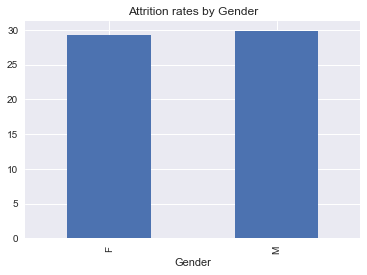

In [504]:
#Create a separate dataframe to analyze Gender
df_gender = df1.loc[0::,['Gender','DOL']]
df_gender_grp = df_gender.groupby(['Gender','DOL'])
df_gender_tab = df_gender_grp.size().unstack()
df_gender_tab['percent_resigned'] = (df_gender_tab[1]/(df_gender_tab[0] + df_gender_tab[1]))*100
print(df_gender_tab.percent_resigned)
df_gender_tab.percent_resigned.plot(kind='bar',title='Attrition rates by Gender')

Gender does not seem to be a significant factor, given that the resignation rates are similar for both males and females.

# Variable Analysis: Supervisor Significance

Often, the supervisor plays a significant role in whether or not an employee will leave the company, and thus bears looking at further. In this dataset, we have data for two levels of supervisors. In other words, we know each employees direct supervisor as well as that supervisors supervisor. Both of these could prove to be useful variable in our analysis going forward.

We will start with an analysis of the Level 2 supervisors, which are the supervisors of the employees direct supervisors. This is because there will be fewer Level 2 supervisors, and each of them will have more employees under their purview. This will allow us to see any trends with greater clarity and less noise.


Bad L2 Supervisor Resignation statistics:
count    31.000000
mean     48.545248
std      11.064419
min      36.904762
25%      40.820148
50%      44.135189
75%      53.174603
max      75.000000
Name: percent_resigned, dtype: float64
DOL                       0      1  percent_resigned
L2Supervisor                                        
-1492017878976722586   77.0   57.0         42.537313
-1723682661671532454   14.0   11.0         44.000000
-2105016610755372661   53.0   31.0         36.904762
-2327551301231750541   15.0    9.0         37.500000
-3032456758019870017   31.0   58.0         65.168539
-3509091846554193183   34.0   73.0         68.224299
-4145959464492319710   97.0   60.0         38.216561
-4279200087475095639   73.0   61.0         45.522388
-504202282314118564    54.0   44.0         44.897959
-5629137619224211413   12.0   16.0         57.142857
-6880664854321319242  281.0  222.0         44.135189
-8286722592230249114   80.0   51.0         38.931298
-8726586833013042250   3

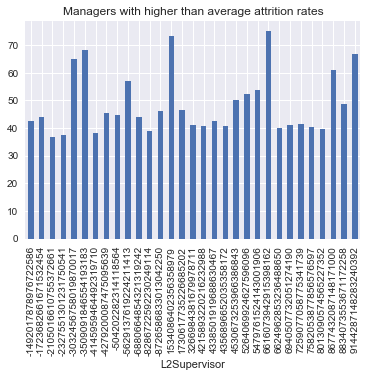

In [505]:
#Create a separate dataframe to analyze Supervisors
df_sup = df1.loc[0::,['L2Supervisor','L1Supervisor','DOL']]
df_L2_grp = df_sup.groupby(['L2Supervisor','DOL'])
df_L2 = df_L2_grp.size().unstack()
df_L1_grp = df_sup.groupby(['L1Supervisor','DOL'])
df_L1 = df_L1_grp.size().unstack()
df_L2.fillna(0,axis=1,inplace=True)
df_L1.fillna(0,axis=1,inplace=True)
df_L2['percent_resigned'] = (df_L2[1]/(df_L2[0] + df_L2[1]))*100
L2_bad = df_L2[(df_L2['percent_resigned']>df_L2.percent_resigned.mean()) & (df_L2['percent_resigned']<100)]
print('\nBad L2 Supervisor Resignation statistics:')
print(L2_bad.percent_resigned.describe())
print(L2_bad)
L2_bad.percent_resigned.plot(kind='bar',title='Managers with higher than average attrition rates')

Now lets look at L1 supervisors:

In [506]:
df_L1.head()

DOL,0,1
L1Supervisor,,
-1013958828308147354,0.0,7.0
-1051408220482477980,15.0,6.0
-1065060981658268550,13.0,4.0
-1147946416409303684,1.0,0.0
-1191717151164422583,29.0,4.0


In [507]:
df_L1.isnull().sum().sum()

0

Overall L1 Resignation statistics:
count    495.000000
mean      35.394204
std       34.113078
min        0.000000
25%        8.000000
50%       27.083333
75%       50.000000
max      100.000000
Name: percent_resigned, dtype: float64

Bad L1 Supervisor Resignation statistics:
count    105.000000
mean      49.669090
std       12.754689
min       35.483871
25%       40.000000
50%       47.058824
75%       55.172414
max       88.888889
Name: percent_resigned, dtype: float64


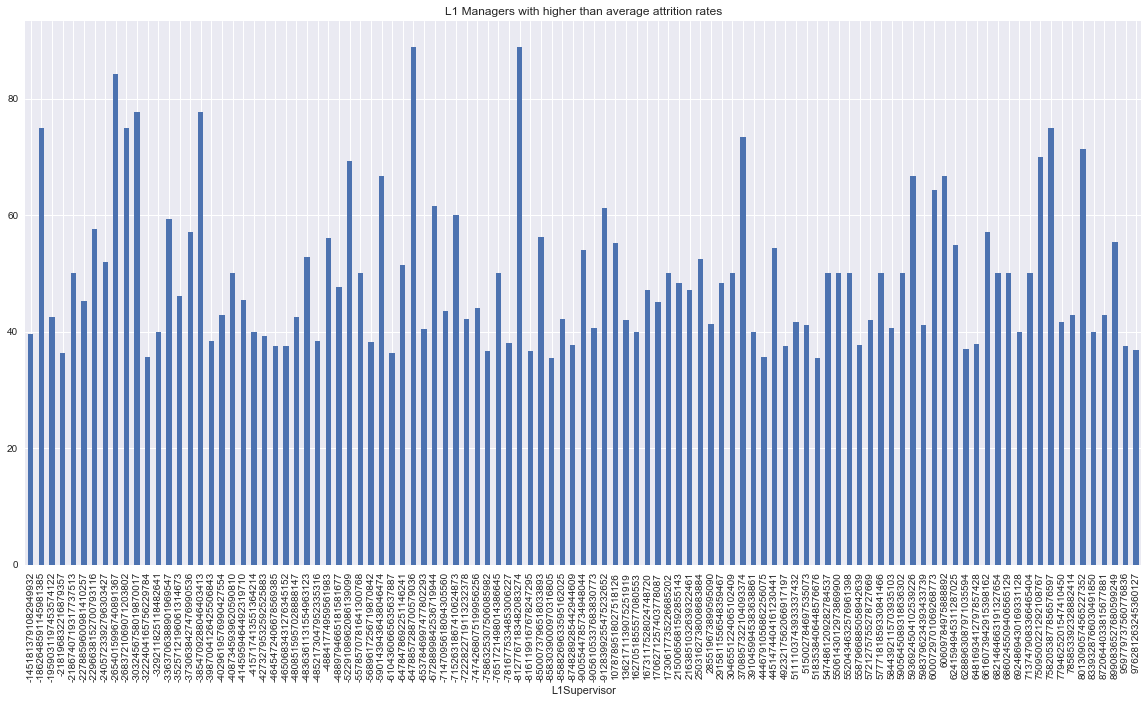

In [508]:
df_L1['percent_resigned'] = (df_L1[1]/(df_L1[0] + df_L1[1]))*100
print('Overall L1 Resignation statistics:')
print(df_L1.percent_resigned.describe())
print('\nBad L1 Supervisor Resignation statistics:')
L1_bad = df_L1[(df_L1['percent_resigned']> df_L1.percent_resigned.mean()) & (df_L1['percent_resigned']<100)]
print(L1_bad.percent_resigned.describe())
L1_bad.percent_resigned.plot(kind='bar',title='L1 Managers with higher than average attrition rates',figsize=(20,10))


Good L1 Supervisor Resignation statistics:
count    308.000000
mean      13.327521
std       12.014679
min        0.000000
25%        0.000000
50%       12.060606
75%       24.583333
max       35.294118
Name: percent_resigned, dtype: float64


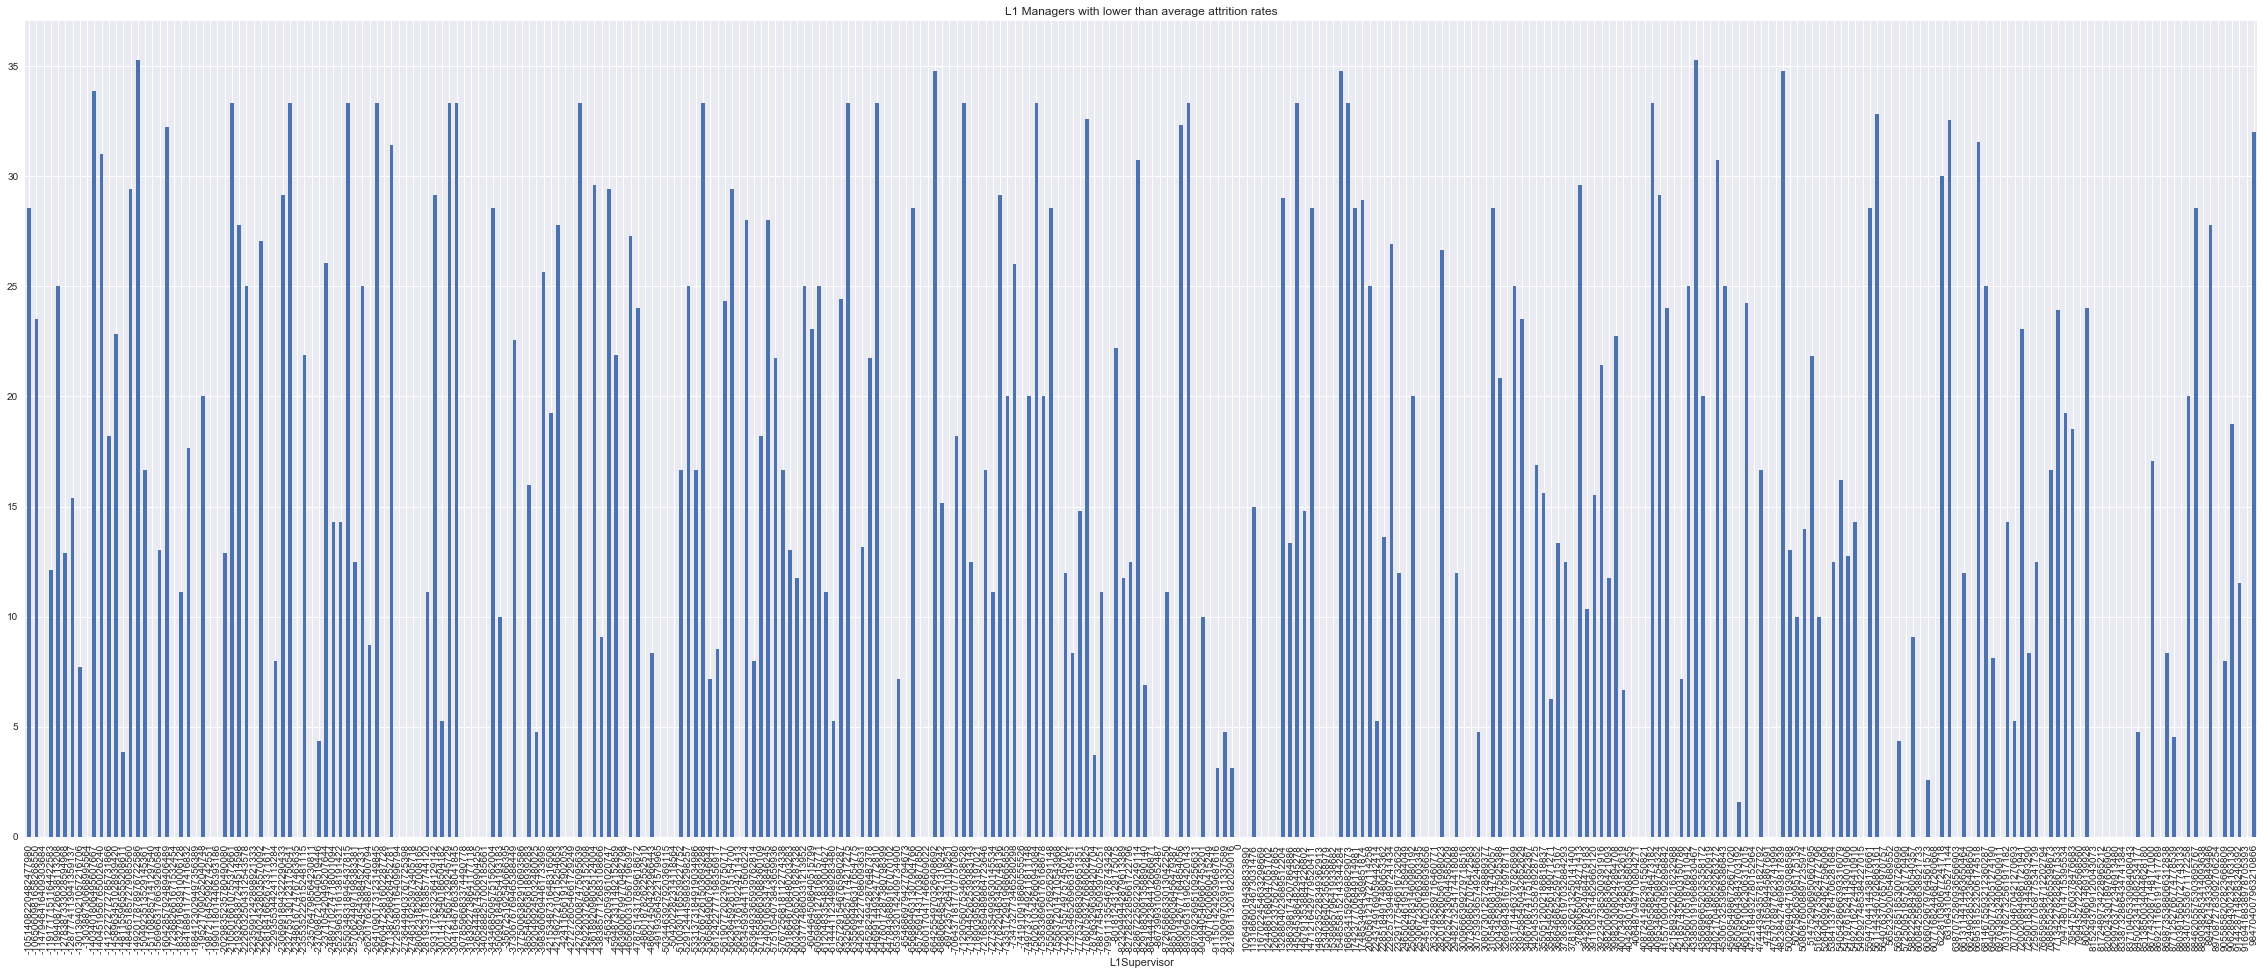

In [509]:
L1_good = df_L1[(df_L1['percent_resigned'] < df_L1.percent_resigned.mean())]
print('\nGood L1 Supervisor Resignation statistics:')
print(L1_good.percent_resigned.describe())
L1_good.percent_resigned.plot(kind='bar',title='L1 Managers with lower than average attrition rates',figsize=(40,15))

In the L1 section of managars, we can again see both good and bad managers, with attrition rates significantly below and above the mean respectively. The overall mean rate seems to be about 35%. There seem to be more 'good' than 'bad' managers.

Now lets look at L2 supervisors:


Good L2 Supervisor Resignation statistics:
count    70.000000
mean     17.856408
std      10.453266
min       0.000000
25%      10.992063
50%      18.512574
75%      26.534957
max      35.294118
Name: percent_resigned, dtype: float64


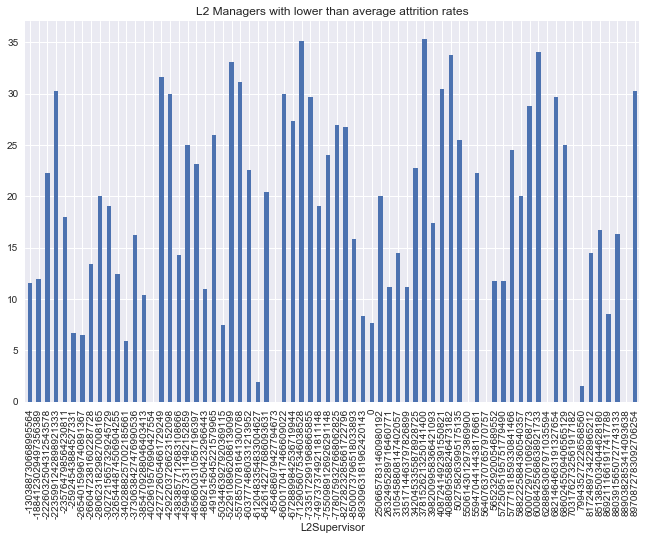

In [510]:
L2_good = df_L2[(df_L2['percent_resigned']<df_L2.percent_resigned.mean())]
print('\nGood L2 Supervisor Resignation statistics:')
print(L2_good.percent_resigned.describe())
L2_good.percent_resigned.plot(kind='bar',title='L2 Managers with lower than average attrition rates',figsize=(11,7))

Overall L2 Resignation statistics:
count    116.000000
mean      36.679752
std       29.565094
min        0.000000
25%       15.512189
50%       29.851485
75%       45.054066
max      100.000000
Name: percent_resigned, dtype: float64


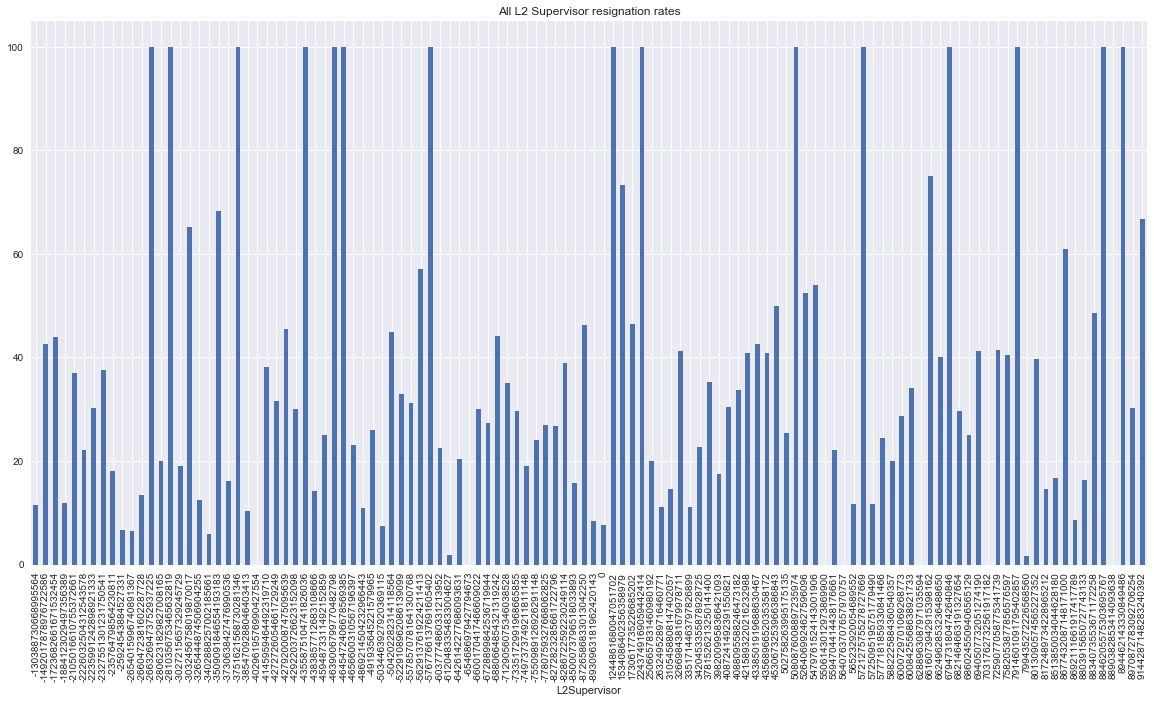

In [511]:
print('Overall L2 Resignation statistics:')
print(df_L2.percent_resigned.describe())
df_L2.percent_resigned.plot(kind='bar',title='All L2 Supervisor resignation rates',figsize=(20,10))

The above graphs seem to show us that there are a few 'bad' L2 supervisors whose employees have a higher than average chance of leaving, but also quite a few 'good' L2 supervisors.

# Variable Analysis: Designation Significance

Designation in this dataset essentially refers to the job title of the employee. There are many such designations, as can be seen below, but they can mostly be boiled down to a few different levels, such as 'Assistant' or 'Executive'. So while analyzing this variable I will split the designations down to simpler and more easily groupable terms.

In [512]:
df1.Designation.value_counts()

Executive                                                          3787
Senior Executive                                                   2516
Assistant Executive                                                1978
Assistant Team Leader                                               156
Senior Executive - Quality                                          130
Team Leader                                                         129
Subject Matter Expert                                                92
Subject Matter Expert - Quality                                      81
Assistant Manager                                                    68
Senior Team Leader                                                   55
Executive - Quality                                                  50
Manager                                                              41
Senior Subject Matter Expert                                         21
Senior Manager                                                  

In [513]:
#Splitting the designation field into a more useful format
df1['primary_designation'] = df.Designation.apply(split_desig_prim)
df1['secondary_designation'] = df.Designation.apply(split_desig_sec)
df1['descriptor_designation'] = df1.Designation.apply(split_desig_des)

The Designation field has been split into the higher level primary designation, the secondary designation, and the descriptor designation that describes the exact role where applicable.

In [514]:
#Creating a separate dataframe to analyze Designation
df_desig = df1.loc[0::,['primary_designation','secondary_designation','descriptor_desgination','DOL']]
df_desig.head()

,primary_designation,secondary_designation,descriptor_desgination,DOL
0,assistant,team leader,NaN,0
1,executive,,NaN,0
2,senior,executive,NaN,0
3,senior,executive,NaN,1
4,executive,,NaN,1


In [515]:
df_desig_primgrp = df_desig.groupby(['primary_designation','DOL'])
df_desig_prim = df_desig_primgrp.size().unstack()
df_desig_prim.fillna(value = 0,axis=1,inplace=True)
df_desig_prim['difference'] = df_desig_prim[0] - df_desig_prim[1]
df_desig_prim['percent_resigned'] = (df_desig_prim[1]/(df_desig_prim[0] + df_desig_prim[1]))*100

33% of the assistants have left the company so far, and along with 28% of the senior designated and 29% percent of executive designated employees.

In [516]:
df_desig = df1.loc[0::,['Designation','descriptor_designation','DOL']]
df_desig.head()

,Designation,descriptor_designation,DOL
0,Assistant Team Leader,None,0
1,Executive,None,0
2,Senior Executive,None,0
3,Senior Executive,None,1
4,Executive,None,1


In [517]:
df_desig['Designation'] = df_desig.Designation.apply(split_desig2)

As the graph below demonstrates, of the primary designations assigned to employees where more employees stay on than leave, the top three such positions are executive level positions.

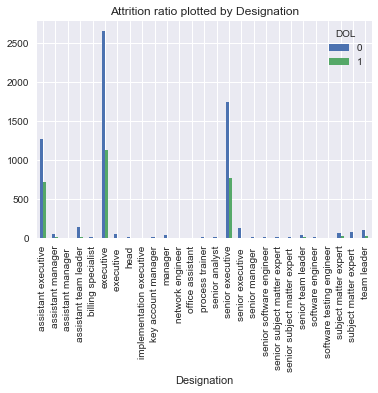

In [518]:
df_desig_grp = df_desig.groupby(['Designation','DOL'])
df_desig_unstack = df_desig_grp.size().unstack('DOL')
df_desig_unstack = df_desig_unstack[(df_desig_unstack[0] > df_desig_unstack[1])]
df_desig_unstack.plot(kind='bar',title='Attrition ratio plotted by Designation')

The table below shows that when we consider the descriptor designations, a higher than normal ratio of employees with the designation 'quality' seem to stay with the company.

In [519]:
df_desig_grp2 = df_desig.groupby(['descriptor_designation','DOL'])
df_desig_grp2.size().unstack()

DOL,0,1
descriptor_designation,,
None,6291.0,2762.0
assistant service desk engineer,3.0,NaN
information security engineer,2.0,NaN
information security technical lead,1.0,NaN
network engineer,3.0,NaN
networking,1.0,NaN
quality,275.0,10.0
senior network engineer,1.0,NaN
senior service desk engineer,1.0,NaN


Lets look at some more postion based insights for designations:

In [520]:
df_desig2 = df1.loc[0::,['primary_designation','secondary_designation','DOL']]
df_desig2['designation_full'] = (df_desig2['primary_designation']+' '+df_desig2['secondary_designation'])
df_desig2['designation_full']= df_desig2.designation_full.apply(split_dash)
df_desig2.designation_full.value_counts()

executive                                 3855
senior executive                          2648
assistant executive                       1978
subject matter expert                      173
assistant team leader                      164
team leader                                137
assistant manager                           71
senior team leader                          57
manager                                     41
senior subject matter expert                31
senior manager                              18
software engineer                           17
senior analyst                              16
key account manager                         15
senior software engineer                    15
process trainer                             13
billing specialist                          11
head                                        11
software developer                           6
software testing engineer                    6
senior software developer                    5
business anal

Overall average attrition rate for most fill designations:
23.652277222369765

DOL                          0       1  percentage_resigned
designation_full                                           
assistant executive     1266.0   712.0            35.995956
assistant manager         56.0    15.0            21.126761
assistant team leader    148.0    16.0             9.756098
executive               2720.0  1135.0            29.442283
senior executive        1881.0   767.0            28.965257
senior team leader        44.0    13.0            22.807018
subject matter expert    141.0    32.0            18.497110
team leader              106.0    31.0            22.627737


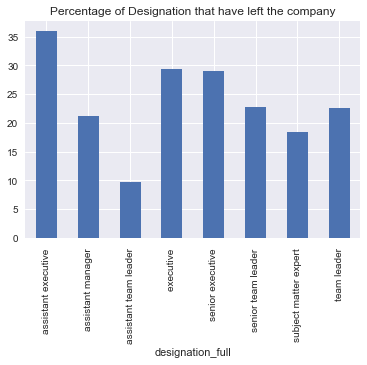

In [521]:
df_desig2_grp = df_desig2.groupby(['designation_full','DOL'])
df_desig2_unstack = df_desig2_grp.size().unstack()
df_desig2_unstack.fillna(0,inplace=True,axis=1)
df_desig2_unstack = df_desig2_unstack[(df_desig2_unstack[0]+df_desig2_unstack[1])>50]
df_desig2_unstack['percentage_resigned'] = (df_desig2_unstack[1]/(df_desig2_unstack[0]+df_desig2_unstack[1]))*100
print('Overall average attrition rate for most fill designations:')
print(df_desig2_unstack.percentage_resigned.mean())
print('')
print(df_desig2_unstack)
df_desig2_unstack.percentage_resigned.plot(kind='bar',title='Percentage of Designation that have left the company')

One interesting insight from the above graph is that apparently, while the attrition rate from assistant executives is above average, the rate for executives is not.

Lets look at what genders dominate which designations, in an effort to learn something about the workplace dynamics, since promotion oppurtunities or lack thereof are often a real concern for employees.

In [522]:
df_desig_gen = df1.loc[0::,['Gender','primary_designation','secondary_designation']]
df_desig_gen['designation_full'] = (df_desig_gen['primary_designation']+' '+df_desig_gen['secondary_designation'])
df_desig_gen['designation_full']= df_desig_gen.designation_full.apply(split_dash)
df_desig_gen.head()

,Gender,primary_designation,secondary_designation,designation_full
0,M,assistant,team leader,assistant team leader
1,F,executive,,executive
2,M,senior,executive,senior executive
3,M,senior,executive,senior executive
4,M,executive,,executive


In [523]:
df_desig_gen_grp = df_desig_gen.groupby(['designation_full','Gender'])
df_desig_gen_unstack=df_desig_gen_grp.size().unstack()
df_desig_gen_unstack.fillna(0,inplace=True,axis=1)
df_desig_gen_final=df_desig_gen_unstack[(df_desig_gen_unstack['F'] + df_desig_gen_unstack['M'])>100]
df_desig_gen_final

Gender,F,M
designation_full,,
assistant executive,920.0,1058.0
assistant team leader,34.0,130.0
executive,1619.0,2236.0
senior executive,886.0,1762.0
subject matter expert,55.0,118.0
team leader,28.0,109.0


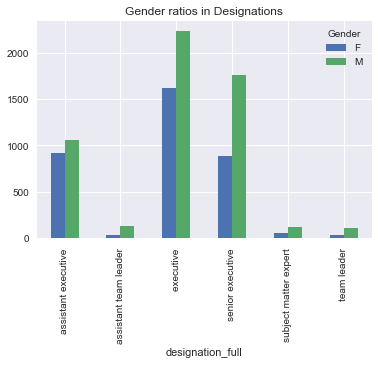

In [524]:
df_desig_gen_final.plot(kind='bar',title='Gender ratios in Designations')

C:\Users\amuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


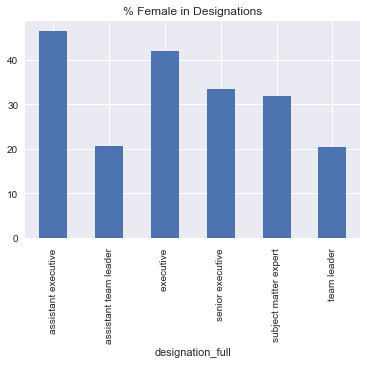

In [525]:
df_desig_gen_final['percent_female'] = (df_desig_gen_final['F']/(df_desig_gen_final['F']+df_desig_gen_final['M']))*100
df_desig_gen_final.percent_female.plot(kind='bar',title='% Female in Designations')

In [526]:
df1.Gender.value_counts()

M    5726
F    3649
Name: Gender, dtype: int64

In [527]:
(3649/(5726+3649))*100

38.922666666666665

It seems that there are more men than woman in the most populated designations. Having said that, proportionally, there are a lot of women in both the assistant executive and executive positions.
For reference, the overall percentage of women in the company is 38.9

# Variable Analysis: Client Significance

This company has a lot of clients that various employees are assigned to, but only a few of them have enough employees to be worth looking at, so I've mostly concentrated on those few clients.

In [528]:
df1.Client.value_counts()

-4917263136805326853    5760
-539353026225707556      470
-2253281316489321542     355
-1458391690231860643     313
917329981066750824       295
-6309067854511061851     293
8598617806208318632      221
-5517525037444128540     199
-3057765553539431202     186
-4101712998755663222     176
8884012915850238890      143
-2472731465450245306     124
4836016451246452003      113
4212982700667171218      110
-6240906014699779599     101
2367865950586272446       95
250317140904036219        86
4115511427300155455       57
-8720358358760703598      51
2725557651918709188       33
4474332322255158581       29
501575413706973491        26
248120158043854622        20
608262967036233712        19
5191547963263514939       15
-7859724580765790360      13
3189289106871117903       12
4030871008292236042        9
-4951078594670446396       9
8763056002222544103        8
-4583858172614033328       7
5508670482428382660        6
-2066729804253579111       5
7973558954177839558        4
75961364324821

I decided to do the same thing here that I did for the supervisors, split them into 'good', 'bad', and 'neutral' groups, depending on how the average attrition rate for the clients compares to the overall average rate. Any clients with fewer than 100 employees will automatically be given a neutral rating.

Overall mean rate of attrition:
28.626393714928373


Mean attrition rate of bad clients:
40.22472861018619
Client
-2472731465450245306    51.612903
-4101712998755663222    40.909091
-4917263136805326853    29.062500
-539353026225707556     43.829787
-6309067854511061851    33.788396
8598617806208318632     47.058824
8884012915850238890     31.468531
917329981066750824      44.067797
Name: percent_resigned, dtype: float64


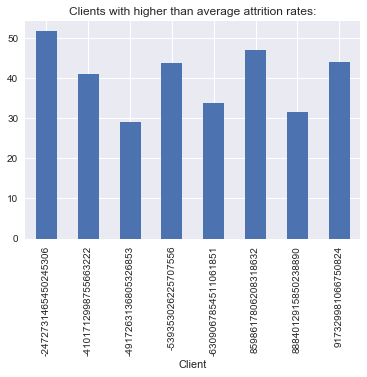

In [529]:
#Create a separate dataframe to analyze Clients
df_clients = df1.loc[0::,['Client','DOL']]
df_clients_grp = df_clients.groupby(['Client','DOL'])

df_clients_tab = df_clients_grp.size().unstack()
df_clients_tab.fillna(value = 0,axis=1,inplace=True)
df_clients_tab['percent_resigned'] = (df_clients_tab[1]/(df_clients_tab[0] + df_clients_tab[1]))*100
df_clients_tab = df_clients_tab[(df_clients_tab[0]+df_clients_tab[1])>100]
print('Overall mean rate of attrition:')
print(df_clients_tab.percent_resigned.mean())
clients_bad = df_clients_tab[df_clients_tab['percent_resigned'] > df_clients_tab.percent_resigned.mean()]
print('\n')
print('Mean attrition rate of bad clients:')
print(clients_bad.percent_resigned.mean())
print(clients_bad.percent_resigned)

clients_bad.percent_resigned.plot(kind='bar',title='Clients with higher than average attrition rates:')

In [530]:
bad_clients = clients_bad.index
print(bad_clients)

Index(['-2472731465450245306', '-4101712998755663222', '-4917263136805326853',
       '-539353026225707556', '-6309067854511061851', '8598617806208318632',
       '8884012915850238890', '917329981066750824'],
      dtype='object', name='Client')


Mean attrition rate of good clients:
15.371153834633734
Client
-1458391690231860643    19.488818
-2253281316489321542    20.000000
-3057765553539431202     4.301075
-5517525037444128540     1.507538
-6240906014699779599    13.861386
4212982700667171218     24.545455
4836016451246452003     23.893805
Name: percent_resigned, dtype: float64


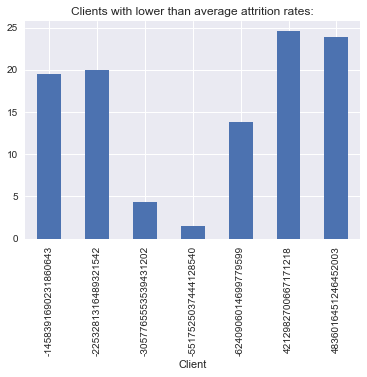

In [531]:
clients_good = df_clients_tab[df_clients_tab['percent_resigned'] < df_clients_tab.percent_resigned.mean()]
print('Mean attrition rate of good clients:')
print(clients_good.percent_resigned.mean())
print(clients_good.percent_resigned)
clients_good.percent_resigned.plot(kind='bar',title='Clients with lower than average attrition rates:')

In [532]:
good_clients = clients_good.index
print(good_clients)

Index(['-1458391690231860643', '-2253281316489321542', '-3057765553539431202',
       '-5517525037444128540', '-6240906014699779599', '4212982700667171218',
       '4836016451246452003'],
      dtype='object', name='Client')


In [533]:
df1['Client_Rating'] = df1.Client.apply(lambda x: sortClients(x,bad_clients,good_clients))

The average percentage of employees resigning is about 29%. There are a few clients that seem to have above normal percentages of employees resigning, such as TPX and Cymetrix. There are also clients that have less employees resigning than normal, such as Continuum and abeo. All the clients displayed above had at least 100 employees assigned to them.

# Variable Analysis: Functionality Significance

Functionality in this dataset is basically the overarching department that the employee is assigned to. Like designation, there are many different specific functionalities, but for our purposes there are or higher level one that are worth looking at. Therefore we will split the functionality titles so that we can more easily group them according to this higher level departments

In [534]:
df1.Functionality.value_counts()

Operations - Revenue Cycle                       1496
Operations - Clinical Document Services          1444
Operations - Billing                              902
Operations - Coding                               687
Operations – Clinical                             613
Operations - Payments Posting Data Entry          538
Operations – Prescribed Low                       309
Operations- Manual Posting                        189
Operations - Data Entry                           188
Operations - Unspecified Denials                  179
Operations – Prescribed High                      173
Operation - AR Billing                            168
Operations- Expanded client work Reduction        143
Operations - Specified Denials                    134
Operations - Remittance Record Posting            115
Operations - Payments Data Entry                  114
Operations - Expanded USACS                        90
Operations- Expanded 7 Kicks                       86
Operations – Denials        

In [535]:
#Splitting functionality to make it more useful
df1['secondary_functionality'] = df1.Functionality.apply(split_functionality)

The Functionality field has been split into the higher level primary functionality, and the secondary functionality that describes the exact role where applicable.

In [536]:
df1.secondary_functionality.value_counts()

revenue cycle                     1496
clinical document services        1444
billing                            902
coding                             687
clinical                           613
payments posting data entry        538
prescribed low                     309
voice                              239
manual posting                     189
data entry                         188
unspecified denials                179
prescribed high                    173
ar billing                         168
expanded client work reduction     143
specified denials                  134
remittance record posting          115
payments data entry                114
expanded usacs                      90
expanded 7 kicks                    86
denials                             83
blade                               81
application development             78
prescribed                          74
f&a                                 69
remittance tracking                 58
human resource           

In [537]:
#Creating new dataframe to analyze Functionality
df_func = df1.loc[0::,['Functionality','secondary_functionality','DOL']]
df_func_grp = df_func.groupby(['Functionality','DOL'])
df_func_grp_unstack=df_func_grp.size().unstack()
df_func_grp_unstack = df_func_grp_unstack[(df_func_grp_unstack[0]/df_func_grp_unstack[1]) > (6602/2773)]
df_func_grp_unstack

DOL,0,1
Functionality,,
Operation - AR Billing,123.0,45.0
Operation - Micro Clustering,29.0,10.0
Operations - Billing,716.0,186.0
Operations - Check Perfect Entry,26.0,4.0
Operations - Clinical Document Services,1408.0,36.0
Operations - Coding,509.0,178.0
Operations - Denials Specified Calling,23.0,7.0
Operations - Enrollment Non-Voice,36.0,2.0
Operations - Expanded Specific Non-Voice,77.0,2.0


The table below seems to show that all the employees with the primary functionality 'it services' or 'management' have stayed on. Proportionally, operations seems to have the most people leaving.

In [538]:
df_func['primary_functionality']=df_func.Functionality.apply(split_functionality2)
print(df_func.primary_functionality.value_counts())
df_func_grp = df_func.groupby(['primary_functionality','DOL'])
df_func_grp_unstack=df_func_grp.size().unstack()
df_func_prim= df_func_grp_unstack
df_func_prim.fillna(value = 0,axis=1,inplace=True)
df_func_prim['difference'] = df_func_prim[0] - df_func_prim[1]
df_func_prim['percent_resigned'] = (df_func_prim[1]/(df_func_prim[0] + df_func_prim[1]))*100

operations         9051
shared services     291
it services          26
managements           7
Name: primary_functionality, dtype: int64


DOL                         0       1  percent_resigned
primary_functionality                                  
it services              26.0     0.0          0.000000
managements               7.0     0.0          0.000000
operations             6330.0  2721.0         30.062976
shared services         239.0    52.0         17.869416


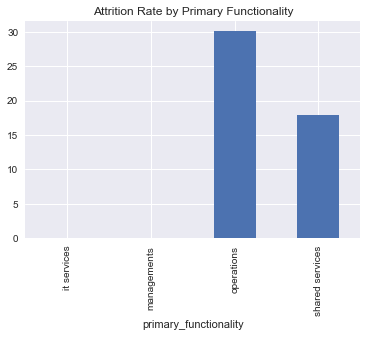

In [539]:
df_func['primary_functionality']=df_func.Functionality.apply(split_functionality2)
df_func_grp = df_func.groupby(['primary_functionality','DOL'])
df_func_grp_unstack=df_func_grp.size().unstack()
df_func_grp_unstack.fillna(0,axis=1,inplace=True)
#df_func_grp_unstack = df_func_grp_unstack[(df_func_grp_unstack[0]/df_func_grp_unstack[1]) > (6602/2773)]
df_func_grp_unstack['percent_resigned'] = (df_func_grp_unstack[1]/(df_func_grp_unstack[0] + df_func_grp_unstack[1]))*100
print(df_func_grp_unstack)
df_func_grp_unstack.percent_resigned.plot(kind='bar',title='Attrition Rate by Primary Functionality')

Out of the four main primary functionalities displayed above, operations seems to have proportionally the most employees leaving, with shared services having the next highest.

Next we will look at the secondary functionality in order to see if there are any significant trends in these more specific categories.

In [540]:
df_func_grp = df_func.groupby(['secondary_functionality','DOL'])
df_func_grp_unstack=df_func_grp.size().unstack()
df_func_grp_unstack = df_func_grp_unstack[(df_func_grp_unstack[0]/df_func_grp_unstack[1])> (6602/2773)]
df_func_grp_unstack

DOL,0,1
secondary_functionality,,
application development,66.0,12.0
ar billing,123.0,45.0
billing,716.0,186.0
blade,67.0,14.0
check perfect entry,26.0,4.0
clinical document services,1408.0,36.0
coding,509.0,178.0
denials highcycle,18.0,1.0
denials specified calling,23.0,7.0


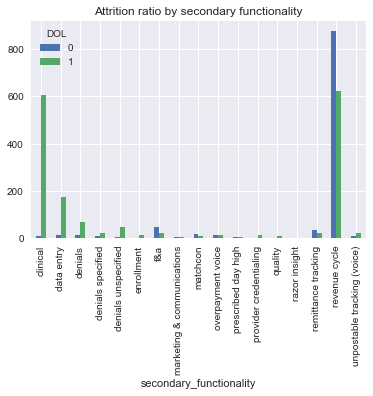

In [541]:
df_func_grp_unstack=df_func_grp.size().unstack()
df_func_grp_unstack = df_func_grp_unstack[(df_func_grp_unstack[0]/df_func_grp_unstack[1])< (6602/2773)]
df_func_grp_unstack.plot(kind='bar',title='Attrition ratio by secondary functionality')

The bar chart and the table above it indicate that among the secondary functionalities, there is more of an even split, with some having more employees lost then gained, such as 'clinical', and some actually managing to retain more then they lose, such as 'revenue cycle'

# Variable Analysis: DOJ Significance


For this analysis, we want to look at not only the employees DOJ(Date of Joining) but also their DOB(Date of Birth), and possibly if the we can use both of them to generate some age related variables. This is because factors such as the year a person joins, how old they are when they joined, how long ago they joined, etc. can be really useful information when predicting if they are going to leave the company.

In [542]:
#Calculate age at joining, see if month of joining, year of joining etc, has any role to play.
df1['year_of_join'] = pd.DatetimeIndex(df1['DOJ']).year
df1['year_of_birth'] = pd.DatetimeIndex(df1['DOB']).year
df1['DOJ'] = pd.to_datetime(df1['DOJ'])
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['age_at_join'] = (df1['DOJ'] - df1['DOB']) / np.timedelta64(1, 'D')

In [543]:
df1.age_at_join.describe()

count     9375.000000
mean      9471.865067
std       3790.378836
min       5657.000000
25%       8141.000000
50%       8771.000000
75%       9667.500000
max      42522.000000
Name: age_at_join, dtype: float64

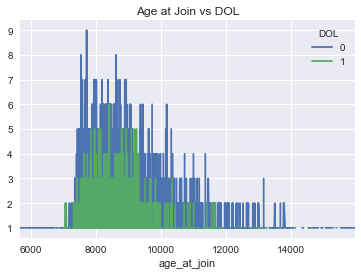

In [544]:
#Create a separate data frame to analyze the Age_at_Join variable
df_age = df1.loc[0::,['age_at_join','DOL']]
df_age_grp = df_age[df_age['age_at_join']<16000].groupby(['age_at_join','DOL'])
df_age_grp.size().unstack().plot(kind='line',title='Age at Join vs DOL')

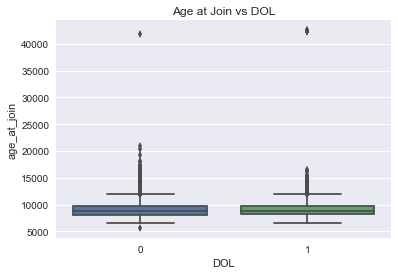

In [545]:
df_age_grp2 = df_age[df_age['age_at_join']<16000].groupby(['DOL'])
df_age_grp2.describe()
plt.title('Age at Join vs DOL')
sns.boxplot(x='DOL',y='age_at_join',data=df_age)

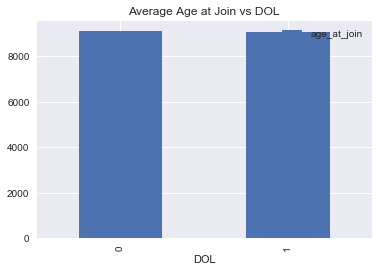

In [546]:
df_age_grp2.mean().plot(kind='bar',title='Average Age at Join vs DOL')

Overall, the age of the employee at joining seems to be the same regardless of if they stay with the company or leave. Thus, it does not seems as significant a variable. The average age of the employees is around 26.

In [547]:
df1.year_of_join.value_counts()

2016    4449
2015    2152
2017    1275
2014    1010
2013     340
2012      99
2011      48
2010       2
Name: year_of_join, dtype: int64

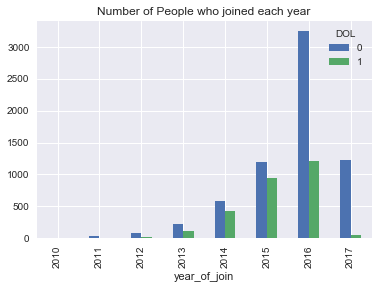

In [548]:
df_join_year = df1.loc[0::,['year_of_join','DOL']]
df_join_year_grp = df_join_year.groupby(['year_of_join','DOL'])
df_join_year_grp.size().unstack().plot(kind='bar',title = 'Number of People who joined each year')
df_join_year_unstack = df_join_year_grp.size().unstack()
df_join_year_unstack.fillna(0,axis=1,inplace=True)

The company seems to have hired most of its employees in the year 2016, which is relatively recently.

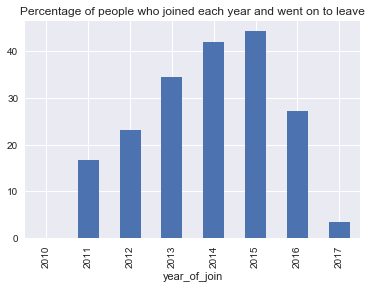

In [549]:
df_join_year_unstack['percent_resigned'] = (df_join_year_unstack[1]/(df_join_year_unstack[0]+df_join_year_unstack[1]))*100
df_join_year_unstack.percent_resigned.plot(kind='bar',title = 'Percentage of people who joined each year and went on to leave')

It seems that many of the employees who joined in the years 2014 and 2015 have since left.

Lets now look at if what year people entered the work force makes any difference:

In [550]:
#Calculating the Year enter force variable
df1['year_enter_force'] = (df1['year_of_join']-(df1['PrevCompanyExp']//12))
df1.year_enter_force.value_counts()

2016    3144
2015    2514
2014    1371
2017     708
2013     707
2012     331
2011     200
2010     116
2009      90
2008      58
2007      48
2006      24
2005      14
2004       9
2018       8
2003       7
2001       6
1992       3
2000       3
1991       2
2002       2
2025       2
1996       2
2026       2
2039       1
1985       1
2019       1
2105       1
Name: year_enter_force, dtype: int64

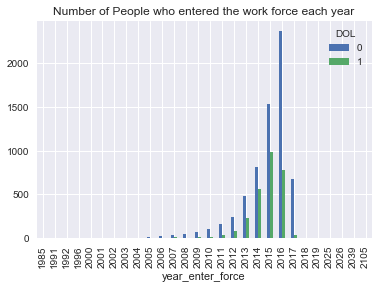

In [551]:
#Create new dataframe to analyze the year enter force variable
df_force = df1.loc[0::,['year_enter_force','DOL']]
df_force_grp = df_force.groupby(['year_enter_force','DOL'])
df_force_grp.size().unstack().plot(kind='bar',title = 'Number of People who entered the work force each year')
df_force_unstack = df_force_grp.size().unstack()
df_force_unstack.fillna(0,axis=1,inplace=True)

This chart corresponds heavily with the chart of when the employees joined the company, suggesting that for many, this company is their first job. Also, many of the employees have entered the work force in the last 3 years.

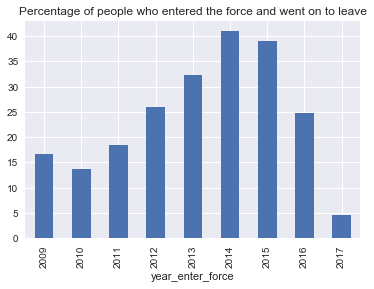

In [552]:
df_force_unstack['percent_resigned'] = (df_force_unstack[1]/(df_force_unstack[0]+df_force_unstack[1]))*100
df_force_unstack = df_force_unstack[(df_force_unstack[0]+df_force_unstack[1])>80]
df_force_unstack.percent_resigned.plot(kind='bar',title = 'Percentage of people who entered the force and went on to leave')

Many of the employees who entered the work force in 2014 and 2015 have since left the company, which lines up with the other statistics

Overall, it seems that the bulk of the company is made up of recent graduates or people for whom this is a first job.

# Variable Analysis: Marital Status

In [553]:
df1.MaritalStatus.value_counts()

Single     7800
Married    1575
Name: MaritalStatus, dtype: int64

Average Attrition Rate:
0.30747557997557995

MaritalStatus
Married    0.325079
Single     0.289872
Name: percent_change, dtype: float64


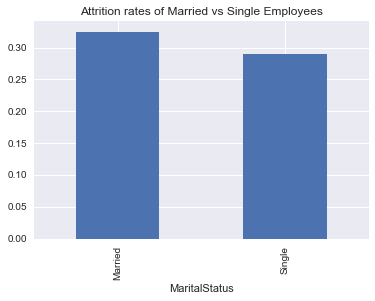

In [554]:
#Create a separate dataframe to analyze MaritalStatus
df_mar = df1.loc[0::,['MaritalStatus','DOL']]
df_mar_grp = df_mar.groupby(['MaritalStatus','DOL'])
df_mar_unstack = df_mar_grp.size().unstack()
df_mar_unstack['percent_change'] = (df_mar_unstack[1]/(df_mar_unstack[0]+df_mar_unstack[1]))
print('Average Attrition Rate:')
print(df_mar_unstack.percent_change.mean())
print('')
print(df_mar_unstack.percent_change)
df_mar_unstack.percent_change.plot(kind='bar',title='Attrition rates of Married vs Single Employees')

According to this graph, married people have a slightly higher attrition rate than unmarried people, which is surprising.

# Variable Analysis: Pincode Significance

I used the pincodes provided in this dataset in two different ways. First, I compared the Pre_Pincode and Per_Pincode fields to determine if the employee had moved from his/her temporary home to a permanent one. If the Per_Pincode field was null, I assumed that the employee had not moved and filled the field with the Pre_Pincode value. I felt comfortable doing this as a relatively small number of employees had the Per_Pincode field empty, and it seemed like a logical assumption to work with.
I also used the pincodes to find out which districts the employees lived in. I did this to reduce the amount of categories that I had to work with in the data, as each district contains multiple pincodes

In [555]:
df1.Per_Pincode.isnull().sum().sum()

170

In [556]:
#Filling in the nan values in Per_Pincode with the corresponding Pre_Pincode value
df1['Per_Pincode'] = np.where(df1['Per_Pincode'].isnull(),df1['Pre_Pincode'],df1['Per_Pincode'])

In [557]:
df1['Moved'] = np.where(df1['Pre_Pincode']==df1['Per_Pincode'],'no','yes')
df1.Moved.value_counts()

no     6389
yes    2986
Name: Moved, dtype: int64

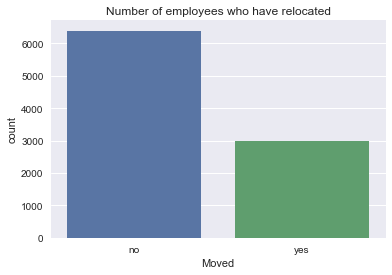

In [558]:
plt.title('Number of employees who have relocated')
sns.countplot(x='Moved',data=df1)

More people live where there permanent pincode is than do not, there are many who have a temporary pincode, indicating that they may have moved.

DOL       0     1  percent_resigned
Moved                              
no     4612  1777         27.813429
yes    1990   996         33.355660


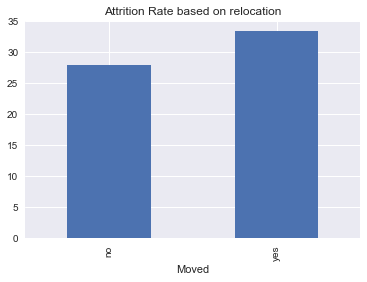

In [559]:
df_mov_grp = df1.groupby(['Moved','DOL'])
df_mov_unstack = df_mov_grp.size().unstack()
df_mov_unstack['percent_resigned'] = (df_mov_unstack[1]/(df_mov_unstack[0]+df_mov_unstack[1]))*100
print(df_mov_unstack)
df_mov_unstack.percent_resigned.plot(kind='bar',title='Attrition Rate based on relocation')

In [560]:
#Create separate dataframe to analyze the pincode variable
df_pin = df1.loc[0::,['Pre_Pincode','Per_Pincode','Moved','DOL']]

In [561]:
#Import file with District Names
pin_tab = pd.read_csv('all_india_pin_code.csv',encoding='ISO-8859-1')

In [562]:
pin_tab = pin_tab.loc[0::,['pincode','Districtname','statename']]

In [563]:
pin_tab=pin_tab.drop_duplicates(subset='pincode',keep='first')

In [564]:
df_pin['Pre_Pincode'] = df_pin['Pre_Pincode'].astype('str').apply(hash).astype('str')
pin_tab['pincode'] = pin_tab['pincode'].astype('str').apply(hash).astype('str')

In [565]:
#Add the District Name based on the Pincode
df_pin = pd.merge(left=df_pin,right=pin_tab[['Districtname','statename']],left_on=['Pre_Pincode'],right_on=pin_tab['pincode'],how='left')

In [566]:
df_pin = df_pin.rename(columns={'Districtname':'Pre_District','statename':'Pre_State'})

In [567]:
df_dis_grp = df_pin.groupby(['Pre_District','DOL'])
df_dis_unstack = df_dis_grp.size().unstack()
df_dis_unstack.fillna(0,inplace=True,axis=1)
df_dis_unstack=df_dis_unstack[(df_dis_unstack[0]+df_dis_unstack[1])>100]
df_dis_unstack

DOL,0,1
Pre_District,,
Chennai,1414.0,807.0
Coimbatore,1361.0,307.0
Kanchipuram,824.0,416.0
Pune,532.0,220.0
Tiruvallur,1863.0,818.0


Mean Attrition Rate:
29.610993924675192



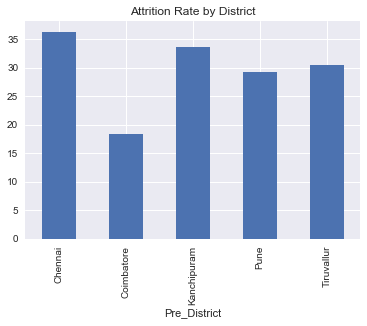

In [568]:
df_dis_unstack['percent_resigned'] = (df_dis_unstack[1]/(df_dis_unstack[0]+df_dis_unstack[1]))*100
print('Mean Attrition Rate:')
print(df_dis_unstack.percent_resigned.mean())
print('')
df_dis_unstack.percent_resigned.plot(kind='bar',title='Attrition Rate by District')

According to the graph above, Coimbatore has a lower than average attrition rate, while Chennai and Kanchipuram have higher than average attrition rates. It should be noted that the International Headquarters of Access Healthcare is in the Tiruvallur district.

In [569]:
df1['Pre_Pincode'] = df1['Pre_Pincode'].astype('str').apply(hash).astype('str')

In [570]:
df1 = pd.merge(left=df1,right=pin_tab[['Districtname']],left_on=['Pre_Pincode'],right_on=pin_tab['pincode'],how='left')

In [571]:
df1['Districts'] = df1.Districtname.apply(district_group)
df1.Districts.value_counts()

Tiruvallur     2681
Chennai        2221
Coimbatore     1668
Kanchipuram    1240
Other           813
Pune            752
Name: Districts, dtype: int64

# Variable Analysis: Dependents Significance

The average number of dependents per employee is around 2.05, which is in line with what would be expected.

In [572]:
df1.Dependents.describe()

count    9375.000000
mean        2.049600
std         0.511854
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Dependents, dtype: float64

DOL            0     1  percent_resigned
Dependents                              
0             80   158         66.386555
1            202    91         31.058020
2           5426  2184         28.699080
3            894   340         27.552674


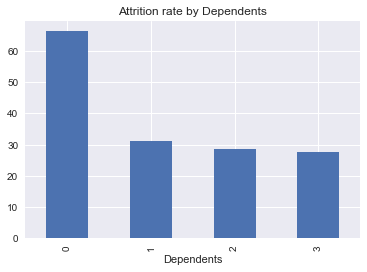

In [573]:
#Create a separate dataframe to analyze Dependents
df_dep = df1.loc[0::,['Dependents','DOL']]
df_dep_grp = df_dep.groupby(['Dependents','DOL'])
df_dep_unstack = df_dep_grp.size().unstack()
df_dep_unstack['percent_resigned'] = (df_dep_unstack[1]/(df_dep_unstack[1] + df_dep_unstack[0]))*100
print(df_dep_unstack)
df_dep_unstack.percent_resigned.plot(kind='bar',title='Attrition rate by Dependents')

The above table and figures show that employees which have more dependents tend to stay proportionally more than employees with less. This is in line with expectations.

In [574]:
df1.columns

Index(['Empcode', 'Gender', 'L1Supervisor', 'L2Supervisor', 'Designation',
       'Client', 'Functionality', 'DOJ', 'DOB', 'MaritalStatus', 'Pre_Pincode',
       'Per_Pincode', 'Dependents', 'rec_id', 'PrevCompanyExp',
       'HighestDegree', 'Major', 'MultipleDegree', 'DOL', 'ExitInitiatedOn',
       'Absconding', 'NoOfSickLeaveAvailed', 'NoOfCLAvailed', 'NoOfELAvailed',
       'MLAvailed', 'Productivity%', 'Quality%', 'LateEntry', 'Shift',
       'primary_designation', 'secondary_designation',
       'descriptor_designation', 'Client_Rating', 'secondary_functionality',
       'year_of_join', 'year_of_birth', 'age_at_join', 'year_enter_force',
       'Moved', 'Districtname', 'Districts'],
      dtype='object')

# Variable Analysis: Previous Company Experience

     PrevCompanyExp
DOL                
0         13.829294
1          9.181753


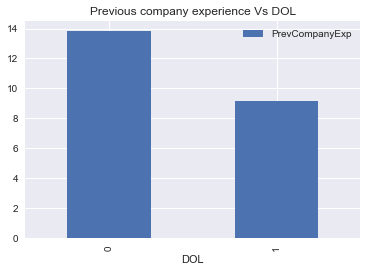

In [575]:
#Create a separate dataframe to analyze Previous Company Experience
df_exp = df1.loc[0::,['PrevCompanyExp','DOL']]
df_exp_grp = df_exp.groupby(['DOL'])
print(df_exp_grp.mean())
df_exp_grp.mean().plot(kind='bar',title='Previous company experience Vs DOL')

The above graph seems to show that employees who stay on with the company have on average more past experience than those who leave the company.

# Variable Analysis: Highest Degree

The qualification of an employee can make a huge difference to his/her continued employment. Often, under or over qualified candidates will leave their company for another one. Hence it is worth checking to see if this is the case here. However, before this column can be analyzed, it has to be clarified so that the degree qualifications are both coherent and uniform.

In addition to cleaning up the column, I have created another column called 'Degree Title', which simply differentiates between the type of degrees the employees posses, eg: 'Bachelors' vs 'Masters'

In [576]:
#Create a separate dataframe to analyze the HighestDegree
df_edu = df1.loc[0::,['HighestDegree','Major','MultipleDegree','DOL']]
df_edu.head()

,HighestDegree,Major,MultipleDegree,DOL
0,BCA,Computer Application,NO,0
1,"MSc.,",Biochemistry,NO,0
2,M.B.A,Human Resource,NO,0
3,Computer Engineering,Computer Engineering,NO,1
4,Mechanical Engineering,Mechanical Engineering,NO,1


In [577]:
df1.HighestDegree.isnull().sum().sum()

409

In [578]:
df1.HighestDegree.fillna('None',inplace=True)

Lets attempt to group the degrees:

In [579]:
df_edu.HighestDegree.describe()

count     8966
unique    2435
top        BCA
freq       799
Name: HighestDegree, dtype: object

In [580]:
#Cleaning up the HighestDegree column
df_edu['HighestDegree'] = df_edu.HighestDegree.astype(str)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(clean_column)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBSC)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBCOM)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBE)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBCA)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBPHARM)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBTECH)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBA)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepMSC)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepMBA)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBCS)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBBA)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBBM)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepMCA)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepBE2)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(RepDip)
df_edu['HighestDegree'] = df_edu.HighestDegree.apply(MPharm)

In [581]:
df_edu.HighestDegree.value_counts()

Bachelor of Science                    2450
Bachelor of Commerce                   1175
Bachelor of Computer Application       1073
Bachelor of Engineering                 785
Bachelor of Arts                        452
nan                                     409
Diploma                                 361
Master of Science                       343
Bachelor of Technology                  332
Bachelor of Business Administration     270
Bachelor of Pharmacy                    253
Master of Business Administration       181
Master of Computer Application           98
Bachelor of Computer Science             92
information technology                   65
ece                                      53
Bachelor of Business Management          46
electronics and communication            46
biotechnology                            42
Master of Pharmacy                       37
bpt                                      26
mcom                                     24
ma                              

HighestDegree
Bachelor of Arts                       27.876106
Bachelor of Business Administration    32.962963
Bachelor of Commerce                   28.255319
Bachelor of Computer Application       27.586207
Bachelor of Computer Science           21.739130
Bachelor of Engineering                33.630573
Bachelor of Pharmacy                   27.272727
Bachelor of Science                    24.897959
Bachelor of Technology                 36.746988
Diploma                                27.146814
Master of Business Administration      28.176796
Master of Computer Application         24.489796
Master of Science                      28.862974
nan                                    57.457213
Name: percent_resigned, dtype: float64

Mean attrition rate:
30.507254690879904


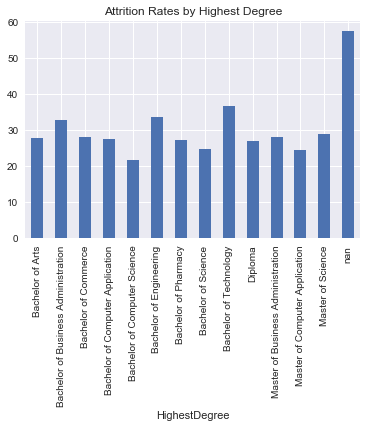

In [582]:
df_edu_grp = df_edu.groupby(['HighestDegree','DOL'])
df_edu_unstack = df_edu_grp.size().unstack()
df_edu_unstack.fillna(0,inplace=True,axis=1)
df_edu_unstack = df_edu_unstack[(df_edu_unstack[0]+df_edu_unstack[1])>90]
df_edu_unstack['percent_resigned'] = (df_edu_unstack[1]/(df_edu_unstack[0]+df_edu_unstack[1]))*100
print(df_edu_unstack.percent_resigned)
print('\n'+'Mean attrition rate:')
print(df_edu_unstack.percent_resigned.mean())
df_edu_unstack.percent_resigned.plot(kind='bar',title='Attrition Rates by Highest Degree')

According to the graph above, people with no degree have the highest attrition rate. Bachelor of Technology, Bachelor of Business Administration, and Bachelor of Engineering also have attrition rates just above the mean. All the degrees graphed have more than 90 employees.

DOL              0     1  percent_resigned
degree_title                              
Bachelor      4988  1940         28.002309
Diploma        263    98         27.146814
Masters        492   194         28.279883
NoData         174   235         57.457213
Others         685   306         30.877901


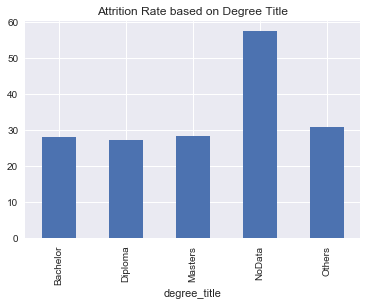

In [583]:
#Create the degree title field
df_edu['degree_title'] = df_edu.HighestDegree.apply(split_degree)
df_edu_title_grp = df_edu.groupby(['degree_title','DOL'])
df_edu_title_unstack = df_edu_title_grp.size().unstack()
df_edu_title_unstack['percent_resigned'] = (df_edu_title_unstack[1]/(df_edu_title_unstack[1]+df_edu_title_unstack[0]))*100
print(df_edu_title_unstack)
df_edu_title_unstack.percent_resigned.plot(kind='bar',title='Attrition Rate based on Degree Title')

It seems that while Bachelors and Masters have about even attrition rates, those with lesser or no degrees tend to have a greater chance of leaving.

In [584]:
df_edu.degree_title.value_counts()

Bachelor    6928
Others       991
Masters      686
NoData       409
Diploma      361
Name: degree_title, dtype: int64

# Variable Analysis: Number of Leaves significance

In [585]:
#Create a seperate dataframe to analyze the number of leaves
df_leaves = df1.loc[0::,['NoOfSickLeaveAvailed','NoOfCLAvailed','NoOfELAvailed','MLAvailed','DOL']]

In [586]:
df_leaves.describe()

,NoOfSickLeaveAvailed,NoOfCLAvailed,NoOfELAvailed,MLAvailed,DOL
count,9375.000000,9375.000000,9375.000000,9375.000000,9375.000000
mean,2.458187,2.799040,0.181600,0.445760,0.295787
std,3.366651,3.160116,0.993932,5.889805,0.456420
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,4.500000,0.000000,0.000000,1.000000
max,35.000000,15.000000,19.000000,118.000000,1.000000


In [587]:
df_leaves = df_leaves.rename(columns = {'NoOfSickLeaveAvailed':'Sick','NoOfCLAvailed':'Casual','NoOfELAvailed':'Earned','MLAvailed':'ML'})

In [588]:
leaves_sick_grp = df_leaves.groupby(['DOL'])
leaves_sick_grp.mean()

,Sick,Casual,Earned,ML
DOL,,,,
0,2.626477,3.135035,0.207513,0.503938
1,2.057519,1.999098,0.119906,0.307248


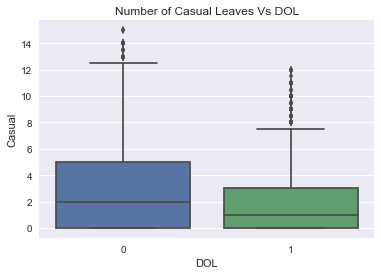

In [589]:
plt.title('Number of Casual Leaves Vs DOL')
sns.boxplot(x='DOL',y='Casual',data=df_leaves)

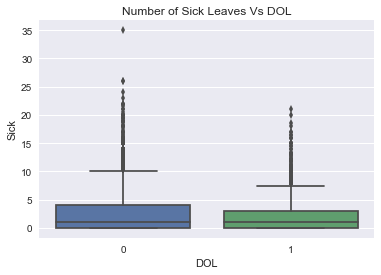

In [590]:
plt.title('Number of Sick Leaves Vs DOL')
sns.boxplot(x='DOL',y='Sick',data=df_leaves)

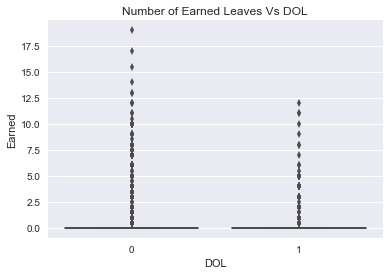

In [591]:
plt.title('Number of Earned Leaves Vs DOL')
sns.boxplot(x='DOL',y='Earned',data=df_leaves)

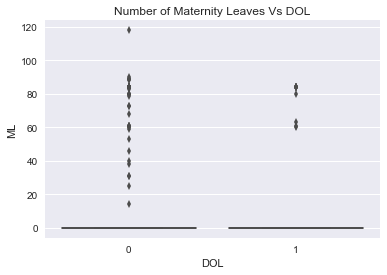

In [592]:
plt.title('Number of Maternity Leaves Vs DOL')
sns.boxplot(x='DOL',y='ML',data=df_leaves)

The above box chart and the table above it seem to suggest that on average, employees who have left the company took less casual and sick leaves than employees who stayed on. This could be a significant predictor in the future.

# Variable Analysis: Productivity Significance

Normally, one would assume that the Quality of an employees work, as well as their productivity, would play a large part in whether or not they would leave. However, I wanted to confirm this for this dataset, as well as see if Productivity and Quality have any sort of correlation.

In [593]:
df1=df1.rename(columns={'Productivity%':'Productivity','Quality%':'Quality'})
df1.Productivity.describe()

count     6609.000000
mean       180.102948
std        379.786331
min          0.000000
25%         57.851250
50%        102.745000
75%        150.401538
max      18736.572308
Name: Productivity, dtype: float64

In [594]:
#Create a separate dataframe to analyze Productivity and Quality
df_prod = df1.loc[0::,['Productivity','Quality','DOL']]

In [595]:
df_prod.Quality.describe()

count    6013.000000
mean       92.952374
std        13.845630
min         0.000000
25%        93.630000
50%        98.138182
75%        99.793333
max       100.000000
Name: Quality, dtype: float64

In [596]:
df_prod['Productivity']=df_prod.Productivity.fillna(df_prod.Productivity.mean())
df_prod['Quality']=df_prod.Quality.fillna(df_prod.Quality.mean())

(-800, 19733.896813307623)

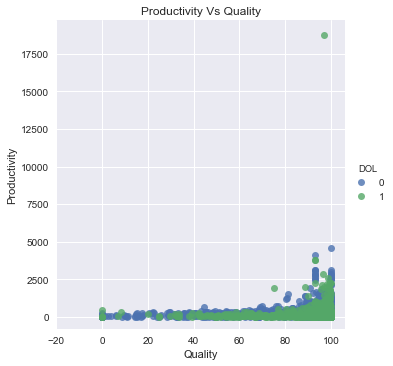

In [597]:
sns.lmplot(x='Quality',y='Productivity',data=df_prod,hue='DOL',fit_reg=False)
plt.title('Productivity Vs Quality')
plt.xlim(-20,None)
plt.ylim(-800,None)

The above scatter plot seems to indicate that there is no clear connection between productivity or quality to an employee leaving the company. However, a positive correlation is seen between productivity and quality.

# Variable Analysis: Late Entry Significance

In [598]:
df1.LateEntry.describe()

count    9375.000000
mean       30.198933
std        37.146088
min         0.000000
25%         6.000000
50%        18.000000
75%        40.000000
max       321.000000
Name: LateEntry, dtype: float64

In [599]:
df1.LateEntry.isnull().sum().sum()

0

     LateEntry
DOL           
0    34.369736
1    20.269023


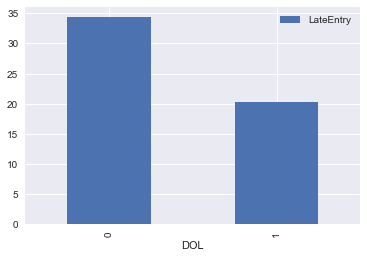

In [600]:
#Create a separate dataframe to analyze LateEntry
df_late = df1.loc[0::,['LateEntry','DOL']]
df_late_grp = df_late.groupby('DOL')
print (df_late_grp.mean())
df_late_grp.mean().plot(kind='bar')

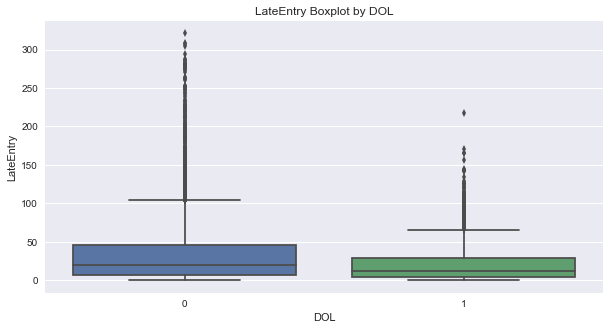

In [601]:
plt.figure(figsize=(10,5))
plt.title('LateEntry Boxplot by DOL')
sns.boxplot(x='DOL',y='LateEntry',data=df_late)

The above two graphs show that on average, those who stayed with the company had a higher number of LateEntry incidences than those who left the company.

# Variable Analysis: Shift Significance

In [602]:
df1.Shift.value_counts()

Day      9289
Night      86
Name: Shift, dtype: int64

In [603]:
#Creating separate dataframe to analyze the Shift variable
df_shift = df1.loc[0::,['Shift','DOL']]
df_shift_grp = df_shift.groupby(['Shift','DOL'])
df_shift_grp.size()

Shift  DOL
Day    0      6602
       1      2687
Night  1        86
dtype: int64

In [604]:
df_shift.DOL.value_counts()

0    6602
1    2773
Name: DOL, dtype: int64

As can be seen in the chart below, there are only two shifts, day and night. There are only 86 employees in the night shift, all of which have left the company. In the day shift, there are 6602 employees that have stayed on, and a further 2687 that have left.

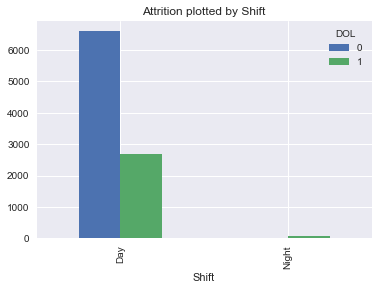

In [605]:
df_shift_grp.size().unstack('DOL').plot(kind='bar',title='Attrition plotted by Shift')

Overall, since all the employees in the Night Shift have left, this could be a useful predictor

# Adding created features to DF1

I created a few features as part of my analysis. As they were created in there own sub-dataframes, I will now put them all into df1.

In [606]:
#Cleaning the highest degree column in df1
df1['HighestDegree'] = df1.HighestDegree.astype(str)
df1['HighestDegree'] = df1.HighestDegree.apply(clean_column)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBSC)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBCOM)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBE)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBCA)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBPHARM)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBTECH)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBA)
df1['HighestDegree'] = df1.HighestDegree.apply(RepMSC)
df1['HighestDegree'] = df1.HighestDegree.apply(RepMBA)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBCS)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBBA)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBBM)
df1['HighestDegree'] = df1.HighestDegree.apply(RepMCA)
df1['HighestDegree'] = df1.HighestDegree.apply(RepBE2)
df1['HighestDegree'] = df1.HighestDegree.apply(RepDip)
df1['HighestDegree'] = df1.HighestDegree.apply(MPharm)
df1['HighestDegree'] = df1.HighestDegree.apply(clean_desig)
df1['degree_title'] = df1.HighestDegree.apply(split_degree)

In [607]:
df1.degree_title.value_counts()

Bachelor    6928
Others      1427
Masters      659
Diploma      361
Name: degree_title, dtype: int64

In [608]:
df1 = df1.rename(columns={'Districtname':'Pre_District'})

In [609]:
df1['primary_functionality']=df1.Functionality.apply(split_functionality2)

In [610]:
df1['secondary_functionality']=df1.secondary_functionality.fillna('none')
df1['secondary_designation'] = df1.secondary_designation.fillna('not_assigned')

In [611]:
df1.Pre_District.fillna('Unknown',inplace=True)

In [612]:
df1['total_leaves'] = df1.NoOfCLAvailed + df1.NoOfSickLeaveAvailed

Fixing Supervisor Rating

In [613]:
#Create separate dataframe to experiment with creating the supervisor rating system
df_fix = df1.loc[0::,['L1Supervisor','L2Supervisor','DOL']]
df_fix.head()

,L1Supervisor,L2Supervisor,DOL
0,4338501919688630467,3781526213250141400,0
1,-7586325307506085982,-6880664854321319242,0
2,9062894302324163130,8513850034044628180,0
3,-7586325307506085982,-6880664854321319242,1
4,976281263245360127,-7335172991968665855,1


In [614]:
fixL1_grp=df_fix.groupby(['L1Supervisor','DOL']).size().unstack()
fixL1_grp.fillna(0,inplace=True)
fixL1_grp['total'] = fixL1_grp[0]+fixL1_grp[1]
fixL1_grp['percent_resigned'] = (fixL1_grp[1]/fixL1_grp['total'])*100
print(fixL1_grp.total.describe())
fixL1_grp = fixL1_grp[fixL1_grp.total>15]
badL1_grp = fixL1_grp[fixL1_grp.percent_resigned>28]

count    495.000000
mean      18.939394
std       15.660116
min        1.000000
25%        6.000000
50%       17.000000
75%       27.000000
max       85.000000
Name: total, dtype: float64


In [615]:
goodL1_grp = fixL1_grp[fixL1_grp.percent_resigned<25]

In [616]:
badL1_lst=badL1_grp.index
goodL1_lst = goodL1_grp.index
print(badL1_lst)
print(goodL1_lst)

Index(['-1051408220482477980', '-1403401806495607667', '-1404519567650026240',
       '-1451813791082949932', '-1484651857279085560', '-1492017878976722586',
       '-1604285792489406489', '-1959031197453574122', '-2186740719317737513',
       '-2278859600981410257',
       ...
       '6821464663191327654', '6924869430169331128', '7794625201547410450',
       '8082402980925375557', '8339328766030491850', '8720644033815677881',
       '8808015179929086938', '8990836527680599249', '976281263245360127',
       '984704007963210866'],
      dtype='object', name='L1Supervisor', length=116)
Index(['-1065060981658268550', '-1191717151164422583', '-1278387333028594968',
       '-1287774113941359137', '-1301394021057216706', '-1412272772785731866',
       '-1458963451028939420', '-1481155965555208611', '-1569663176639260584',
       '-1832791683910006128',
       ...
       '8299763772346913480', '8338732886434741384', '8450233414082534177',
       '8677432087148171000', '8698735388066312838', '

In [617]:
df1['L1_Supervisor_Rating'] = df1.L1Supervisor.apply(lambda x: sortL1(x,badL1_lst,goodL1_lst))
df1.L1_Supervisor_Rating.value_counts()

Bad        3899
Good       3698
Neutral    1778
Name: L1_Supervisor_Rating, dtype: int64

In [618]:
fixL2_grp=df_fix.groupby(['L2Supervisor','DOL']).size().unstack()
fixL2_grp.fillna(0,inplace=True)
fixL2_grp['total'] = fixL2_grp[0]+fixL2_grp[1]
fixL2_grp['percent_resigned'] = (fixL2_grp[1]/fixL2_grp['total'])*100
fixL2_grp = fixL2_grp[fixL2_grp.total>50]
badL2_grp = fixL2_grp[fixL2_grp.percent_resigned>28]

In [619]:
goodL2_grp = fixL2_grp[fixL2_grp.percent_resigned<26]

In [620]:
badL2_lst=badL2_grp.index
goodL2_lst = goodL2_grp.index
goodL2_lst

Index(['-130388730668995564', '-1884123029497356389', '-235764798564230811',
       '-2660472381602287728', '-2806231829827008165', '-3027215657329245729',
       '-3265444874506904255', '-3730638427476990536', '-3854709288046403413',
       '-4594873311492152859', '-4656600310567196397', '-4869214504232966443',
       '-5034463927920369115', '-6037774860331213952', '-6120483354833004627',
       '-6426142277686093631', '-8500073796518033893', '2632495289716460771',
       '3105458808147402057', '3982009958366421093', '502758263995175135',
       '5594704414438176661', '5777181859330841466', '5882225884360540357',
       '6860245509406565129', '799435272226568560', '8172489734228965212',
       '8692111661917417789'],
      dtype='object', name='L2Supervisor')

In [621]:
df1['L2_Supervisor_Rating'] = df1.L2Supervisor.apply(lambda x: sortL2(x,badL2_lst,goodL2_lst))
df1.L2_Supervisor_Rating.value_counts()

Bad        4368
Good       3534
Neutral    1473
Name: L2_Supervisor_Rating, dtype: int64

# Variable Analysis: Relationship between Functionality and Designation

This section analyizes the relationship between the functionality and designation variables, and creates two new variables to better define that relationship to the learning model.

In [622]:
#Create separate dataframe to explore primary functionality and primary designation
df_exp = df1.loc[0::,['primary_functionality','primary_designation','DOL']]

In [623]:
df_exp_grp = df_exp.groupby(['primary_functionality','primary_designation','DOL'])
df_exp_grp.size().unstack()

DOL                                             0       1
primary_functionality primary_designation                
it services           assistant               1.0     NaN
                      business                3.0     NaN
                      project                 1.0     NaN
                      senior                  7.0     NaN
                      software                8.0     NaN
                      team                    1.0     NaN
                      trainee                 5.0     NaN
managements           chief                   2.0     NaN
                      e                       1.0     NaN
                      executive               1.0     NaN
                      president               1.0     NaN
                      senior                  1.0     NaN
                      vice                    1.0     NaN
operations            analyst                 NaN     2.0
                      assistant            1448.0   743.0
                      billing                 8.0     3.0
                      executive            2667.0  1125.0
                      head                    3.0     NaN
                      key                    13.0     2.0
                      manager                24.0     3.0
                      process                12.0     1.0
                      senior               1926.0   786.0
                      service                 1.0     NaN
                      site                    1.0     NaN
                      subject               139.0    32.0
                      systems                 1.0     NaN
                      team                   86.0    23.0
                      vice                    1.0     NaN
                      voice                   NaN     1.0
shared services       assistant              29.0     2.0
                      business                2.0     NaN
                      company                 1.0     NaN
                      corporate               1.0     NaN
                      desktop                 5.0     NaN
                      executive              53.0    10.0
                      front                   1.0     NaN
                      head                    5.0     3.0
                      implementation          2.0     1.0
                      key                     1.0     NaN
                      management              1.0     NaN
                      manager                14.0     3.0
                      network                 2.0     1.0
                      office                  2.0     1.0
                      product                 2.0     NaN
                      project                 1.0     1.0
                      public                  2.0     NaN
                      security                4.0     NaN
                      senior                 71.0     9.0
                      software               14.0     8.0
                      solution                1.0     2.0
                      subject                 2.0     NaN
                      team                   19.0     8.0
                      voice                   4.0     3.0

count     5.000000
mean     26.475169
std       6.342384
min      18.713450
25%      21.100917
50%      28.982301
75%      29.667722
max      33.911456
Name: percent_resigned, dtype: float64


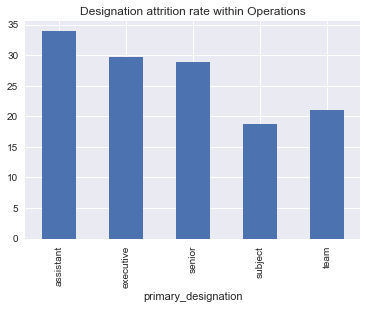

In [624]:
df_exp_op = df_exp[df_exp['primary_functionality']=='operations']
df_exp_op_grp = df_exp_op.groupby(['primary_designation','DOL'])
df_exp_op_unstack = df_exp_op_grp.size().unstack()
df_exp_op_unstack = df_exp_op_unstack.fillna(0)
df_exp_op_unstack['total'] = df_exp_op_unstack[0] + df_exp_op_unstack[1]
df_exp_op_unstack = df_exp_op_unstack[df_exp_op_unstack['total']>100]
df_exp_op_unstack['percent_resigned'] = (df_exp_op_unstack[1]/df_exp_op_unstack['total'])*100
print(df_exp_op_unstack.percent_resigned.describe())
df_exp_op_unstack.percent_resigned.plot(kind='bar',title='Designation attrition rate within Operations')

count     5.000000
mean     19.913579
std      12.625513
min       6.451613
25%      11.250000
50%      15.873016
75%      29.629630
max      36.363636
Name: percent_resigned, dtype: float64


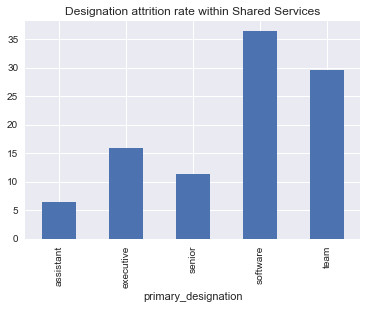

In [625]:
df_exp_sha = df_exp[df_exp['primary_functionality']=='shared services']
df_exp_sha_grp = df_exp_sha.groupby(['primary_designation','DOL'])
df_exp_sha_unstack = df_exp_sha_grp.size().unstack()
df_exp_sha_unstack = df_exp_sha_unstack.fillna(0)
df_exp_sha_unstack['total'] = df_exp_sha_unstack[0] + df_exp_sha_unstack[1]
df_exp_sha_unstack = df_exp_sha_unstack[df_exp_sha_unstack['total']>20]
df_exp_sha_unstack['percent_resigned'] = (df_exp_sha_unstack[1]/df_exp_sha_unstack['total'])*100
print(df_exp_sha_unstack.percent_resigned.describe())
df_exp_sha_unstack.percent_resigned.plot(kind='bar',title='Designation attrition rate within Shared Services')

Adding a variable 'operation_assistant' to df1

In [626]:
df1['Operation_Assistant'] = np.where(((df1['primary_functionality']=='operations') & 
                                       (df1['primary_designation']=='assistant')),1,0)

Adding a variable 'shared_software' to df1

In [627]:
df1['Shared_Software'] = np.where(((df1['primary_functionality']=='shared services') & 
                                       (df1['primary_designation']=='software')),1,0)

# Variable Analysis: Adding more Productivity and Quality variables

This section creates three new variables in an effort to better define the relationship between the Productivity and Quality variables.

In [628]:
df1.Productivity.isnull().sum().sum()

2766

In [629]:
df1.Quality.isnull().sum().sum()

3362

In [630]:
#Variable for when Productivity is null and Quality isn't
df1['NullProd'] = np.where((df1.Productivity.isnull() & df1.Quality.notnull()),1,0)

In [631]:
#Variable for when Quality is null and Productivity isn't
df1['NullQual'] = np.where((df1.Quality.isnull() & df1.Productivity.notnull()),1,0)

In [632]:
#Variable for when both Productivity and Quality are null
df1['Both_Null_Prod_Qual'] = np.where((df1.Quality.isnull() & df1.Productivity.isnull()),1,0)

# Final Check for Categorical features


This is to check that there are no null values left in any of the variables that we are going to use in the model.

In [633]:
cat_features = ['Gender','L1Supervisor','L2Supervisor','primary_designation','secondary_designation',\
           'Client','Functionality','secondary_functionality','year_of_birth','year_enter_force','MaritalStatus',\
           'Pre_District','Pre_Pincode','Per_Pincode','HighestDegree','primary_functionality']
for feature in cat_features:
    num_nulls = df1[feature].isnull().sum().sum()
    print('Num null values for '+feature+': '+str(num_nulls))

Num null values for Gender: 0
Num null values for L1Supervisor: 0
Num null values for L2Supervisor: 0
Num null values for primary_designation: 0
Num null values for secondary_designation: 0
Num null values for Client: 0
Num null values for Functionality: 0
Num null values for secondary_functionality: 0
Num null values for year_of_birth: 0
Num null values for year_enter_force: 0
Num null values for MaritalStatus: 0
Num null values for Pre_District: 0
Num null values for Pre_Pincode: 0
Num null values for Per_Pincode: 0
Num null values for HighestDegree: 0
Num null values for primary_functionality: 0


# Exporting Processed Data

In [634]:
df1.to_csv('processed_data.csv')

# Model Building

In [635]:
df1 = pd.read_csv('processed_data.csv',encoding='ISO-8859-1')

## Train Test Split, Scaling and One Hot Encoding

To prepare the data for modelling, I converted the categorical variables to dummy variables, and then split the dataset into training and testing sets. I split after getting the dummy variables because had I done it before, there was a chance that depending on the values in each set, the training and testing sets would have a different number of columns, and testing the model accurately would be impossible.

I also scaled the data using MinMaxing for use in the Logistic Regression model. I used MinMaxing instead of Standard Scaling because it was giving a consistently better performance.

The Quality variable was also dropped, as doing so improved the accuracy of both models.

In [636]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split

In [637]:
features = ['Gender','L1_Supervisor_Rating','L2_Supervisor_Rating','primary_designation','secondary_designation',\
           'Client','secondary_functionality','MaritalStatus','NullProd','NullQual','Both_Null_Prod_Qual',\
           'HighestDegree','primary_functionality','Districts','PrevCompanyExp','Moved',\
           'total_leaves','age_at_join','degree_title','Dependents','Productivity','LateEntry',\
           'Operation_Assistant','Shared_Software']

In [638]:
X = df1[features]
y = df1.DOL

In [639]:
#One Hot Encoding
X = pd.get_dummies(X)

In [640]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=2)

In [641]:
#Imputing the Productivity variable with its mean
productivity = X_train.Productivity.mean()
X_train['Productivity'] = X_train.Productivity.fillna(productivity)
X_test['Productivity'] = X_test.Productivity.fillna(productivity)

C:\Users\amuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\amuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [642]:
int_vars = ['age_at_join','Dependents','Productivity','LateEntry',\
          'total_leaves','PrevCompanyExp']
#Scaling the data with MinMax
min_max = MinMaxScaler()
X_train_minmax = X_train.copy()
X_train_minmax[int_vars] = min_max.fit_transform(X_train_minmax[int_vars])

In [643]:
min_max = MinMaxScaler()
X_test_minmax = X_test.copy()
X_test_minmax[int_vars] = min_max.fit_transform(X_test_minmax[int_vars])

## Training Models

In [644]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.grid_search import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

Accuracy to beat is 71%

### Model: Logistic regression

Dropping first level of every variable while using logistic regression

In [645]:
drop_columns = ['Gender_F','L1_Supervisor_Rating_Bad','L2_Supervisor_Rating_Bad','primary_designation_analyst',\
               'secondary_designation_- information security engineer ','secondary_functionality_aetna claims processing',\
               'MaritalStatus_Married','HighestDegree_Bachelor of Arts','primary_functionality_it services',\
               'Districts_Chennai','degree_title_Bachelor']
X_train_minmax_1 = X_train_minmax.drop(drop_columns,1)
X_test_minmax_1 = X_test_minmax.drop(drop_columns,1)

In [646]:
#Initialize the Logistic Regression Model (minmaxed data)
lr_minmax = LogisticRegression(random_state=2)
#Check Accuracy of the model
model = lr_minmax.fit(X_train_minmax_1,y_train)
pred = model.predict(X_test_minmax_1)
lr_score_minmax = accuracy_score(pred,y_test)
print('Accuracy of MinMaxed Logistic Regression is: '+str(lr_score_minmax))

Accuracy of MinMaxed Logistic Regression is: 0.669066666667


### Model: Gradient Boosting Classifier

In [647]:
#Initialize the GBC model
gbc = GradientBoostingClassifier(random_state=2)
#Check Accuracy of the model
model = gbc.fit(X_train,y_train)
pred = model.predict(X_test)
gbc_score_base = accuracy_score(pred,y_test)
print('Accuracy of base GBC is: '+str(gbc_score_base))

Accuracy of base GBC is: 0.876533333333


Of the base models, the Gradient Boosting Classifier performed better, so I decided to tune it first.

I am using GridSearchCV to find the optimum hyperparameters for both of the original models, Gradient Boosting Classifier and Logistic Regression.

### Tuning Gradient Boosting Model:

Initial accuracy: 0.88

In [390]:
gbc_tuned = GradientBoostingClassifier(random_state=2,learning_rate=0.1)

In [391]:
param_test1 = {'n_estimators':list(range(150,201,10))}
gsearch1 = GridSearchCV(gbc_tuned,param_grid = param_test1, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88320, std: 0.00857, params: {'n_estimators': 150},
  mean: 0.88462, std: 0.00776, params: {'n_estimators': 160},
  mean: 0.88480, std: 0.00732, params: {'n_estimators': 170},
  mean: 0.88516, std: 0.00657, params: {'n_estimators': 180},
  mean: 0.88516, std: 0.00721, params: {'n_estimators': 190},
  mean: 0.88480, std: 0.00676, params: {'n_estimators': 200}],
 {'n_estimators': 180},
 0.8851555555555557)

In [392]:
param_test1 = {'n_estimators':list(range(160,191,2))}
gsearch1 = GridSearchCV(gbc_tuned,param_grid = param_test1, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88462, std: 0.00776, params: {'n_estimators': 160},
  mean: 0.88516, std: 0.00738, params: {'n_estimators': 162},
  mean: 0.88444, std: 0.00787, params: {'n_estimators': 164},
  mean: 0.88444, std: 0.00756, params: {'n_estimators': 166},
  mean: 0.88462, std: 0.00692, params: {'n_estimators': 168},
  mean: 0.88480, std: 0.00732, params: {'n_estimators': 170},
  mean: 0.88462, std: 0.00770, params: {'n_estimators': 172},
  mean: 0.88444, std: 0.00769, params: {'n_estimators': 174},
  mean: 0.88444, std: 0.00748, params: {'n_estimators': 176},
  mean: 0.88480, std: 0.00758, params: {'n_estimators': 178},
  mean: 0.88516, std: 0.00657, params: {'n_estimators': 180},
  mean: 0.88462, std: 0.00664, params: {'n_estimators': 182},
  mean: 0.88462, std: 0.00664, params: {'n_estimators': 184},
  mean: 0.88551, std: 0.00669, params: {'n_estimators': 186},
  mean: 0.88480, std: 0.00732, params: {'n_estimators': 188},
  mean: 0.88516, std: 0.00721, params: {'n_estimators': 190}],
 {'n_es

In [393]:
gbc_tuned = GradientBoostingClassifier(random_state=2,learning_rate=0.1,n_estimators=174)

In [394]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,601,200))}
gsearch2 = GridSearchCV(gbc_tuned,param_grid = param_test2, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.88533, std: 0.00369, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.88498, std: 0.00489, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.88427, std: 0.00248, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.88836, std: 0.00430, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.88889, std: 0.00421, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.88676, std: 0.00400, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.89156, std: 0.00467, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.89049, std: 0.00569, params: {'max_depth': 9, 'min_samples_split': 400},
  mean: 0.88924, std: 0.00445, params: {'max_depth': 9, 'min_samples_split': 600},
  mean: 0.89156, std: 0.00651, params: {'max_depth': 11, 'min_samples_split': 200},
  mean: 0.89227, std: 0.00619, params: {'max_depth': 11, 'min_samples_split': 400},
  mean: 0.89316, std: 0.00520, params: {'max_depth': 11, 'min_samples_split': 600},
 

In [395]:
param_test2 = {'max_depth':list(range(14,28,2)), 'min_samples_split':list(range(200,601,100))}
gsearch2 = GridSearchCV(gbc_tuned,param_grid = param_test2, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.88907, std: 0.00315, params: {'max_depth': 14, 'min_samples_split': 200},
  mean: 0.89102, std: 0.00479, params: {'max_depth': 14, 'min_samples_split': 300},
  mean: 0.89280, std: 0.00358, params: {'max_depth': 14, 'min_samples_split': 400},
  mean: 0.89084, std: 0.00403, params: {'max_depth': 14, 'min_samples_split': 500},
  mean: 0.89209, std: 0.00423, params: {'max_depth': 14, 'min_samples_split': 600},
  mean: 0.89227, std: 0.00520, params: {'max_depth': 16, 'min_samples_split': 200},
  mean: 0.89191, std: 0.00371, params: {'max_depth': 16, 'min_samples_split': 300},
  mean: 0.89262, std: 0.00563, params: {'max_depth': 16, 'min_samples_split': 400},
  mean: 0.89333, std: 0.00480, params: {'max_depth': 16, 'min_samples_split': 500},
  mean: 0.89120, std: 0.00495, params: {'max_depth': 16, 'min_samples_split': 600},
  mean: 0.89084, std: 0.00529, params: {'max_depth': 18, 'min_samples_split': 200},
  mean: 0.89351, std: 0.00294, params: {'max_depth': 18, 'min_samples_split'

In [396]:
gbc_tuned = GradientBoostingClassifier(random_state=2,learning_rate=0.1,n_estimators=174,max_depth=15,
                                       min_samples_split=300)

In [397]:
param_test3 = {'min_samples_split':list(range(200,1000,100)), 'min_samples_leaf':list(range(30,71,10))}
gsearch3 = GridSearchCV(gbc_tuned,param_grid = param_test3, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.87627, std: 0.00848, params: {'min_samples_leaf': 30, 'min_samples_split': 200},
  mean: 0.87751, std: 0.01073, params: {'min_samples_leaf': 30, 'min_samples_split': 300},
  mean: 0.87502, std: 0.00913, params: {'min_samples_leaf': 30, 'min_samples_split': 400},
  mean: 0.87822, std: 0.00763, params: {'min_samples_leaf': 30, 'min_samples_split': 500},
  mean: 0.87733, std: 0.00672, params: {'min_samples_leaf': 30, 'min_samples_split': 600},
  mean: 0.87680, std: 0.00743, params: {'min_samples_leaf': 30, 'min_samples_split': 700},
  mean: 0.87680, std: 0.00918, params: {'min_samples_leaf': 30, 'min_samples_split': 800},
  mean: 0.87253, std: 0.01047, params: {'min_samples_leaf': 30, 'min_samples_split': 900},
  mean: 0.87253, std: 0.00984, params: {'min_samples_leaf': 40, 'min_samples_split': 200},
  mean: 0.87093, std: 0.00614, params: {'min_samples_leaf': 40, 'min_samples_split': 300},
  mean: 0.86969, std: 0.00732, params: {'min_samples_leaf': 40, 'min_samples_split': 400},

In [398]:
param_test3 = {'min_samples_split':list(range(500,701,50)), 'min_samples_leaf':list(range(10,41,5))}
gsearch3 = GridSearchCV(gbc_tuned,param_grid = param_test3, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.88142, std: 0.00508, params: {'min_samples_leaf': 10, 'min_samples_split': 500},
  mean: 0.88551, std: 0.00627, params: {'min_samples_leaf': 10, 'min_samples_split': 550},
  mean: 0.88267, std: 0.00533, params: {'min_samples_leaf': 10, 'min_samples_split': 600},
  mean: 0.88284, std: 0.00468, params: {'min_samples_leaf': 10, 'min_samples_split': 650},
  mean: 0.88231, std: 0.00688, params: {'min_samples_leaf': 10, 'min_samples_split': 700},
  mean: 0.88178, std: 0.00303, params: {'min_samples_leaf': 15, 'min_samples_split': 500},
  mean: 0.87893, std: 0.00482, params: {'min_samples_leaf': 15, 'min_samples_split': 550},
  mean: 0.88249, std: 0.00348, params: {'min_samples_leaf': 15, 'min_samples_split': 600},
  mean: 0.88338, std: 0.00546, params: {'min_samples_leaf': 15, 'min_samples_split': 650},
  mean: 0.88142, std: 0.00514, params: {'min_samples_leaf': 15, 'min_samples_split': 700},
  mean: 0.87893, std: 0.00635, params: {'min_samples_leaf': 20, 'min_samples_split': 500},

In [399]:
param_test3 = {'min_samples_split':list(range(600,701,20)), 'min_samples_leaf':list(range(1,13,2))}
gsearch3 = GridSearchCV(gbc_tuned,param_grid = param_test3, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.89476, std: 0.00438, params: {'min_samples_leaf': 1, 'min_samples_split': 600},
  mean: 0.89369, std: 0.00340, params: {'min_samples_leaf': 1, 'min_samples_split': 620},
  mean: 0.89351, std: 0.00383, params: {'min_samples_leaf': 1, 'min_samples_split': 640},
  mean: 0.89067, std: 0.00439, params: {'min_samples_leaf': 1, 'min_samples_split': 660},
  mean: 0.89422, std: 0.00634, params: {'min_samples_leaf': 1, 'min_samples_split': 680},
  mean: 0.89191, std: 0.00610, params: {'min_samples_leaf': 1, 'min_samples_split': 700},
  mean: 0.88996, std: 0.00685, params: {'min_samples_leaf': 3, 'min_samples_split': 600},
  mean: 0.89120, std: 0.00741, params: {'min_samples_leaf': 3, 'min_samples_split': 620},
  mean: 0.88853, std: 0.00476, params: {'min_samples_leaf': 3, 'min_samples_split': 640},
  mean: 0.89173, std: 0.00516, params: {'min_samples_leaf': 3, 'min_samples_split': 660},
  mean: 0.88978, std: 0.00512, params: {'min_samples_leaf': 3, 'min_samples_split': 680},
  mean: 0.

In [400]:
gbc_tuned = GradientBoostingClassifier(random_state=2,learning_rate=0.1,n_estimators=174,max_depth=15,
                                       min_samples_split=650)

In [401]:
param_test4 = {'max_features':list(range(2,25,1))}
gsearch4 = GridSearchCV(gbc_tuned,param_grid = param_test4, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.88533, std: 0.00582, params: {'max_features': 2},
  mean: 0.88267, std: 0.00750, params: {'max_features': 3},
  mean: 0.88409, std: 0.00479, params: {'max_features': 4},
  mean: 0.89013, std: 0.00612, params: {'max_features': 5},
  mean: 0.88764, std: 0.00913, params: {'max_features': 6},
  mean: 0.89138, std: 0.00725, params: {'max_features': 7},
  mean: 0.89138, std: 0.00763, params: {'max_features': 8},
  mean: 0.89049, std: 0.00875, params: {'max_features': 9},
  mean: 0.89138, std: 0.00736, params: {'max_features': 10},
  mean: 0.89244, std: 0.00643, params: {'max_features': 11},
  mean: 0.89191, std: 0.00669, params: {'max_features': 12},
  mean: 0.89351, std: 0.00840, params: {'max_features': 13},
  mean: 0.89120, std: 0.00430, params: {'max_features': 14},
  mean: 0.88853, std: 0.00628, params: {'max_features': 15},
  mean: 0.89173, std: 0.00669, params: {'max_features': 16},
  mean: 0.89209, std: 0.00459, params: {'max_features': 17},
  mean: 0.89173, std: 0.00810, p

In [402]:
gbc_tuned = GradientBoostingClassifier(random_state=2,learning_rate=0.1,n_estimators=174,max_depth=15,
                                       min_samples_split=650,max_features = 23)

In [403]:
param_test5 = {'subsample':[0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]}
gsearch5 = GridSearchCV(gbc_tuned,param_grid = param_test5, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.88622, std: 0.00773, params: {'subsample': 0.6},
  mean: 0.88924, std: 0.00486, params: {'subsample': 0.65},
  mean: 0.89031, std: 0.00517, params: {'subsample': 0.7},
  mean: 0.89173, std: 0.00593, params: {'subsample': 0.75},
  mean: 0.89244, std: 0.00548, params: {'subsample': 0.8},
  mean: 0.89031, std: 0.00697, params: {'subsample': 0.85},
  mean: 0.89209, std: 0.00655, params: {'subsample': 0.9},
  mean: 0.89262, std: 0.00475, params: {'subsample': 0.95}],
 {'subsample': 0.95},
 0.8926222222222222)

In [404]:
gbc_tuned = GradientBoostingClassifier(random_state=2,learning_rate=0.1,n_estimators=174,max_depth=8,
                                       min_samples_split=650,max_features = 23,subsample = 0.95)

In [405]:
#Check Accuracy of the model
model = gbc_tuned.fit(X_train,y_train)
pred = model.predict(X_test)
gbc_score_base = accuracy_score(pred,y_test)
print('Accuracy of base GBC is: '+str(gbc_score_base))

Accuracy of base GBC is: 0.8952


In [406]:
#Check for overfitting
model = gbc_tuned.fit(X_train,y_train)
pred = model.predict(X_train)
gbc_score_base = accuracy_score(pred,y_train)
print('Accuracy of base GBC is: '+str(gbc_score_base))

Accuracy of base GBC is: 0.911466666667


### Tuning Logistic Regression

Initial accuracy: 0.874

In [407]:
lr_tuned = LogisticRegression(random_state=2)

In [408]:
param_test1 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'],'fit_intercept':[True,False]}
gsearch1 = GridSearchCV(lr_tuned,param_grid = param_test1, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch1.fit(X_train_minmax_1,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.70311, std: 0.00000, params: {'C': 0.001, 'fit_intercept': True, 'penalty': 'l1'},
  mean: 0.70311, std: 0.00000, params: {'C': 0.001, 'fit_intercept': True, 'penalty': 'l2'},
  mean: 0.70311, std: 0.00000, params: {'C': 0.001, 'fit_intercept': False, 'penalty': 'l1'},
  mean: 0.70311, std: 0.00000, params: {'C': 0.001, 'fit_intercept': False, 'penalty': 'l2'},
  mean: 0.75591, std: 0.00434, params: {'C': 0.01, 'fit_intercept': True, 'penalty': 'l1'},
  mean: 0.80000, std: 0.01010, params: {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'},
  mean: 0.75591, std: 0.00434, params: {'C': 0.01, 'fit_intercept': False, 'penalty': 'l1'},
  mean: 0.80036, std: 0.00971, params: {'C': 0.01, 'fit_intercept': False, 'penalty': 'l2'},
  mean: 0.84907, std: 0.00458, params: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1'},
  mean: 0.85724, std: 0.00514, params: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'},
  mean: 0.84907, std: 0.00458, params: {'C': 0.1, 'fit_intercept': False, 

In [409]:
param_test1 = {'C': [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],'penalty':['l1','l2'],'fit_intercept':[True,False]}
gsearch1 = GridSearchCV(lr_tuned,param_grid = param_test1, scoring='accuracy',n_jobs = 4,iid=False,cv=5)
gsearch1.fit(X_train_minmax_1,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.86933, std: 0.00385, params: {'C': 0.5, 'fit_intercept': True, 'penalty': 'l1'},
  mean: 0.87307, std: 0.00569, params: {'C': 0.5, 'fit_intercept': True, 'penalty': 'l2'},
  mean: 0.86951, std: 0.00391, params: {'C': 0.5, 'fit_intercept': False, 'penalty': 'l1'},
  mean: 0.87307, std: 0.00498, params: {'C': 0.5, 'fit_intercept': False, 'penalty': 'l2'},
  mean: 0.86969, std: 0.00541, params: {'C': 0.6, 'fit_intercept': True, 'penalty': 'l1'},
  mean: 0.87324, std: 0.00492, params: {'C': 0.6, 'fit_intercept': True, 'penalty': 'l2'},
  mean: 0.86987, std: 0.00541, params: {'C': 0.6, 'fit_intercept': False, 'penalty': 'l1'},
  mean: 0.87324, std: 0.00492, params: {'C': 0.6, 'fit_intercept': False, 'penalty': 'l2'},
  mean: 0.87218, std: 0.00659, params: {'C': 0.7, 'fit_intercept': True, 'penalty': 'l1'},
  mean: 0.87360, std: 0.00482, params: {'C': 0.7, 'fit_intercept': True, 'penalty': 'l2'},
  mean: 0.87271, std: 0.00630, params: {'C': 0.7, 'fit_intercept': False, 'penalty': '

In [410]:
#Check the models accuracy
lr_tuned = LogisticRegression(random_state=2,C=1.1,fit_intercept=True,penalty='l1')
model = lr_tuned.fit(X_train_minmax_1,y_train)
pred = model.predict(X_test_minmax_1)
lr_score_minmax = accuracy_score(pred,y_test)
print('Accuracy of MinMaxed Logistic Regression is: '+str(lr_score_minmax))

Accuracy of MinMaxed Logistic Regression is: 0.877333333333


## Final Models

These are the final models with hyperparameter tuning. Gradient Boosting is performing the best, with and accuracy of 89.52%.

### Model: Gradient Boosting Classifier

In [411]:
gbc_tuned = GradientBoostingClassifier(random_state=2,learning_rate=0.1,n_estimators=174,max_depth=8,
                                       min_samples_split=650,max_features = 23,subsample = 0.95)
#Check Accuracy of the model
model = gbc_tuned.fit(X_train,y_train)
pred = model.predict(X_test)m
gbc_score_base = accuracy_score(pred,y_test)
print('Accuracy of base GBC is: '+str(gbc_score_base))

Accuracy of base GBC is: 0.8952


### Model: Logistic Regression

In [412]:
lr_tuned = LogisticRegression(random_state=2,C=1.1,fit_intercept=True,penalty='l1')
model = lr_tuned.fit(X_train_minmax_1,y_train)
pred = model.predict(X_test_minmax_1)
lr_score_minmax = accuracy_score(pred,y_test)
print('Accuracy of MinMaxed Logistic Regression is: '+str(lr_score_minmax))

Accuracy of MinMaxed Logistic Regression is: 0.877333333333
